### Data Preaparation 

In [1]:
#call file and module
import pandas as pd # untuk analisa dataframe
import sqlite3 as sql # untuk import data olist.db
import numpy as np # untuk perhitungan statistik 
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi
from datetime import datetime # untuk parsing date

con = sql.connect("olist.db")
cur = con.cursor()
table_list = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

In [2]:
# call table from file data
data_review = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con) 
data_status = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
data_price = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
data_product = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
data_product_1 = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)
data_region = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)

In [3]:
# Make new Data Frame
join_1 = pd.merge(data_review , data_status, how='left', on = 'order_id') # join data untuk melihat respon customer dan seller
join_2 = pd.merge(join_1 , data_price, how='left', on = 'order_id') # join data untuk analysis harga dan income
join_product = pd.merge(data_product , data_product_1, how='inner', on = 'product_category_name') # join data untuk mendapatkan nama product
join_3 = pd.merge(join_2 , join_product, how='left', on = 'product_id') # join data agar dapat terkoneksi dengan join data sebelumnya
final_join = pd.merge(join_3 , data_region, how='left', on = 'seller_id') # join data untuk mendapatkan regions dan state

# Drop table yang tidak digunakan
drop_data = final_join.drop(["review_id", "review_comment_title", "review_comment_message", 
                              "review_creation_date", "review_answer_timestamp", "order_id", 
                              "customer_id", "order_approved_at", "order_delivered_carrier_date", 
                              "order_estimated_delivery_date", "order_item_id", "product_id", "seller_id", 
                              "shipping_limit_date", "product_name_lenght", "product_description_lenght", 
                              "product_weight_g","product_id", "product_category_name", "seller_id","product_length_cm", 
                              "product_height_cm","product_width_cm", "seller_zip_code_prefix"], axis=1)

# Drop table yang tidak digunakan
final_join = drop_data.drop (["index_x_x","index_y_x", "index_x","index_x_y","index_y_y","index_y"], axis=1)
rename_data = final_join.rename(columns = {'product_category_name_english' :'product'},inplace=True) # ubah nama table
data_analisa = pd.DataFrame(final_join)

# Cleaning Null


In [4]:
# Cleaning Data
data_analisa.describe(include="all").T
missing_nulls = data_analisa.isnull().sum().sort_values(ascending=False)
Nan_columns = ['order_delivered_customer_date', 'product','product_photos_qty','price','freight_value', 'seller_city','seller_state'] # Column berisi nilai Null
data_analisa[Nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113131 entries, 0 to 113130
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_delivered_customer_date  110012 non-null  object 
 1   product                        110750 non-null  object 
 2   product_photos_qty             110750 non-null  float64
 3   price                          112372 non-null  float64
 4   freight_value                  112372 non-null  float64
 5   seller_city                    112372 non-null  object 
 6   seller_state                   112372 non-null  object 
dtypes: float64(3), object(4)
memory usage: 6.9+ MB


In [5]:
# Persentase data null
n_data = len(data_analisa)

percent_nan_col = (missing_nulls/n_data) * 100
column_contain_nan = pd.DataFrame(percent_nan_col[percent_nan_col > 0],
                                  columns = ["%nan"])

column_contain_nan

,%nan
order_delivered_customer_date,2.756981
product_photos_qty,2.104640
product,2.104640
price,0.670904
freight_value,0.670904
seller_city,0.670904
seller_state,0.670904


# Visualization Data Distribustion

C:\Users\Pompy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


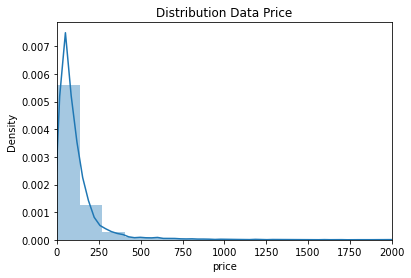

In [6]:
price=data_analisa['price'].dropna()
sns.distplot(price)
plt.title("Distribution Data Price")
plt.xlim(0, 2000)
plt.show()

C:\Users\Pompy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


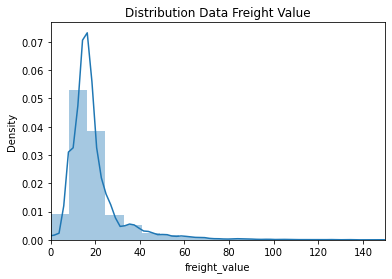

In [7]:
freight_value=data_analisa['freight_value'].dropna()
sns.distplot(freight_value)
plt.title("Distribution Data Freight Value")
plt.xlim(0, 150)
plt.show()

C:\Users\Pompy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


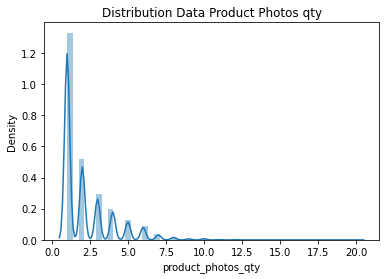

In [8]:
product_w=data_analisa['product_photos_qty'].dropna()
sns.distplot(product_w)
plt.title("Distribution Data Product Photos qty")
plt.show()

# Handling Missing Values & Duplicate

In [9]:
# Handling missing value
# Convert data to modus
mod_or = data_analisa["order_delivered_customer_date"].mode()[0]
mod_pt = data_analisa["product"].mode()[0]
mod_sc = data_analisa["seller_city"].mode()[0]
mod_st = data_analisa["seller_state"].mode()[0]

# Convert data to median
med_pq = data_analisa["product_photos_qty"].median()
med_pr = data_analisa["price"].median()
med_fr = data_analisa["freight_value"].median()

# fill data to missing values
data_analisa["order_delivered_customer_date"] = data_analisa["order_delivered_customer_date"].fillna(mod_or)
data_analisa["product"] = data_analisa["product"].fillna(mod_pt)
data_analisa["product_photos_qty"] = data_analisa["product_photos_qty"].fillna(med_pq)
data_analisa["price"] = data_analisa["price"].fillna(med_pr)
data_analisa["freight_value"] = data_analisa["freight_value"].fillna(med_fr)
data_analisa["seller_city"] = data_analisa["seller_city"].fillna(mod_sc)
data_analisa["seller_state"] = data_analisa["seller_state"].fillna(mod_st)

In [10]:
# pengecekan data null yang telah diubah
data_analisa.isnull().sum().sort_values(ascending=False)

# Handling duplicate
data_analisa.duplicated().count()
data_analisa.drop_duplicates(keep='first',inplace=True, ignore_index=True)

<AxesSubplot:xlabel='review_score'>

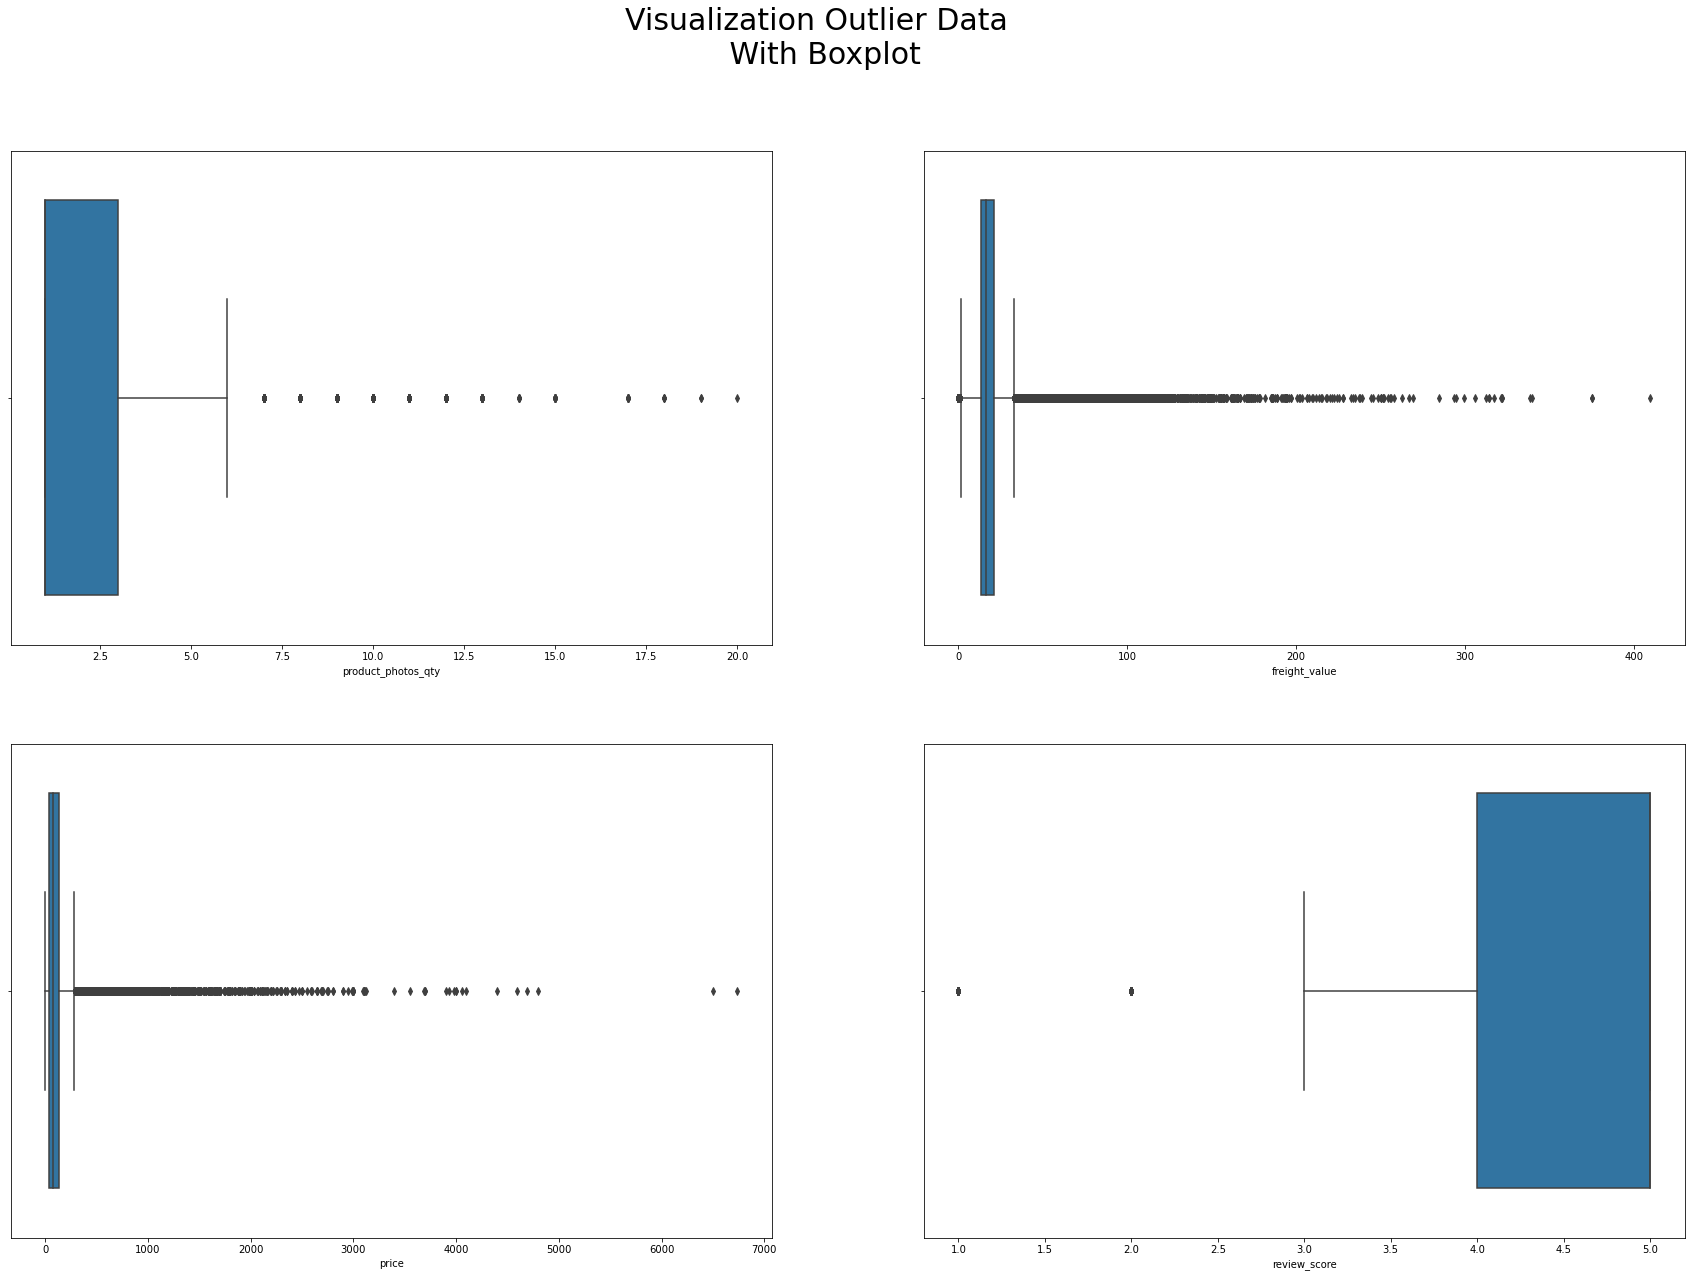

In [11]:
# Handling Outlier
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Visualization Outlier Data \n With Boxplot', fontsize =30)

sns.boxplot(ax=axes[0, 0], data=data_analisa, x='product_photos_qty')
sns.boxplot(ax=axes[0, 1], data=data_analisa, x='freight_value')
sns.boxplot(ax=axes[1, 0], data=data_analisa, x='price')
sns.boxplot(ax=axes[1, 1], data=data_analisa, x='review_score')

In [12]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

    outliers = [] # simpan data dalam bentuk list
    data = sorted(data) # sort data values
    q1 = np.percentile(data, 25) # compute the q1
    q3 = np.percentile(data, 75) # compute the q3   
    IQR = q3-q1 # compute the IQR
    lwr_bound = q1-(1.5*IQR) # set the lower bound
    upr_bound = q3+(1.5*IQR) # set the upper bound
    print("lower:",lwr_bound, "upper:", upr_bound)

    # looping columns
    for i in data:

        if (i<lwr_bound or i>upr_bound):

            outliers.append(i)

    return outliers

In [13]:
# pengecekan data outlier
outlier_columns = [ "product_photos_qty","freight_value", "price", "review_score"] # tabel yang terdapat nilai outlier

for col in outlier_columns:

    outlier = detect_outliers_iqr(data_analisa[col])
    outlier
    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print()

lower: -2.0 upper: 6.0
number of outliers in column 'product_photos_qty' is 2926

lower: 1.2550000000000026 upper: 33.135
number of outliers in column 'freight_value' is 11142

lower: -104.75 upper: 285.25
number of outliers in column 'price' is 7660

lower: 2.5 upper: 6.5
number of outliers in column 'review_score' is 15655



In [14]:
# Delete outlier with handling capping
def capping_outlier(col):
    
    # Mendefinisikan batas atas dan bawah outlier
    lwr_limit = data_analisa[col].quantile(0.03)
    upr_limit = data_analisa[col].quantile(0.97)

    print(str(col).upper())
    print("lwr values:", lwr_limit, "upr values:", upr_limit)
    print()
    
    # melakukan filter outlier
    data_analisa[col] = np.where(data_analisa[col]> upr_limit, upr_limit, 
                                        np.where(data_analisa[col]< lwr_limit, lwr_limit, data_analisa[col]))
for col in outlier_columns:
    capping_outlier(col)

PRODUCT_PHOTOS_QTY
lwr values: 1.0 upr values: 6.0

FREIGHT_VALUE
lwr values: 7.49 upr values: 57.33

PRICE
lwr values: 14.9 upr values: 509.0

REVIEW_SCORE
lwr values: 1.0 upr values: 5.0



<AxesSubplot:xlabel='review_score'>

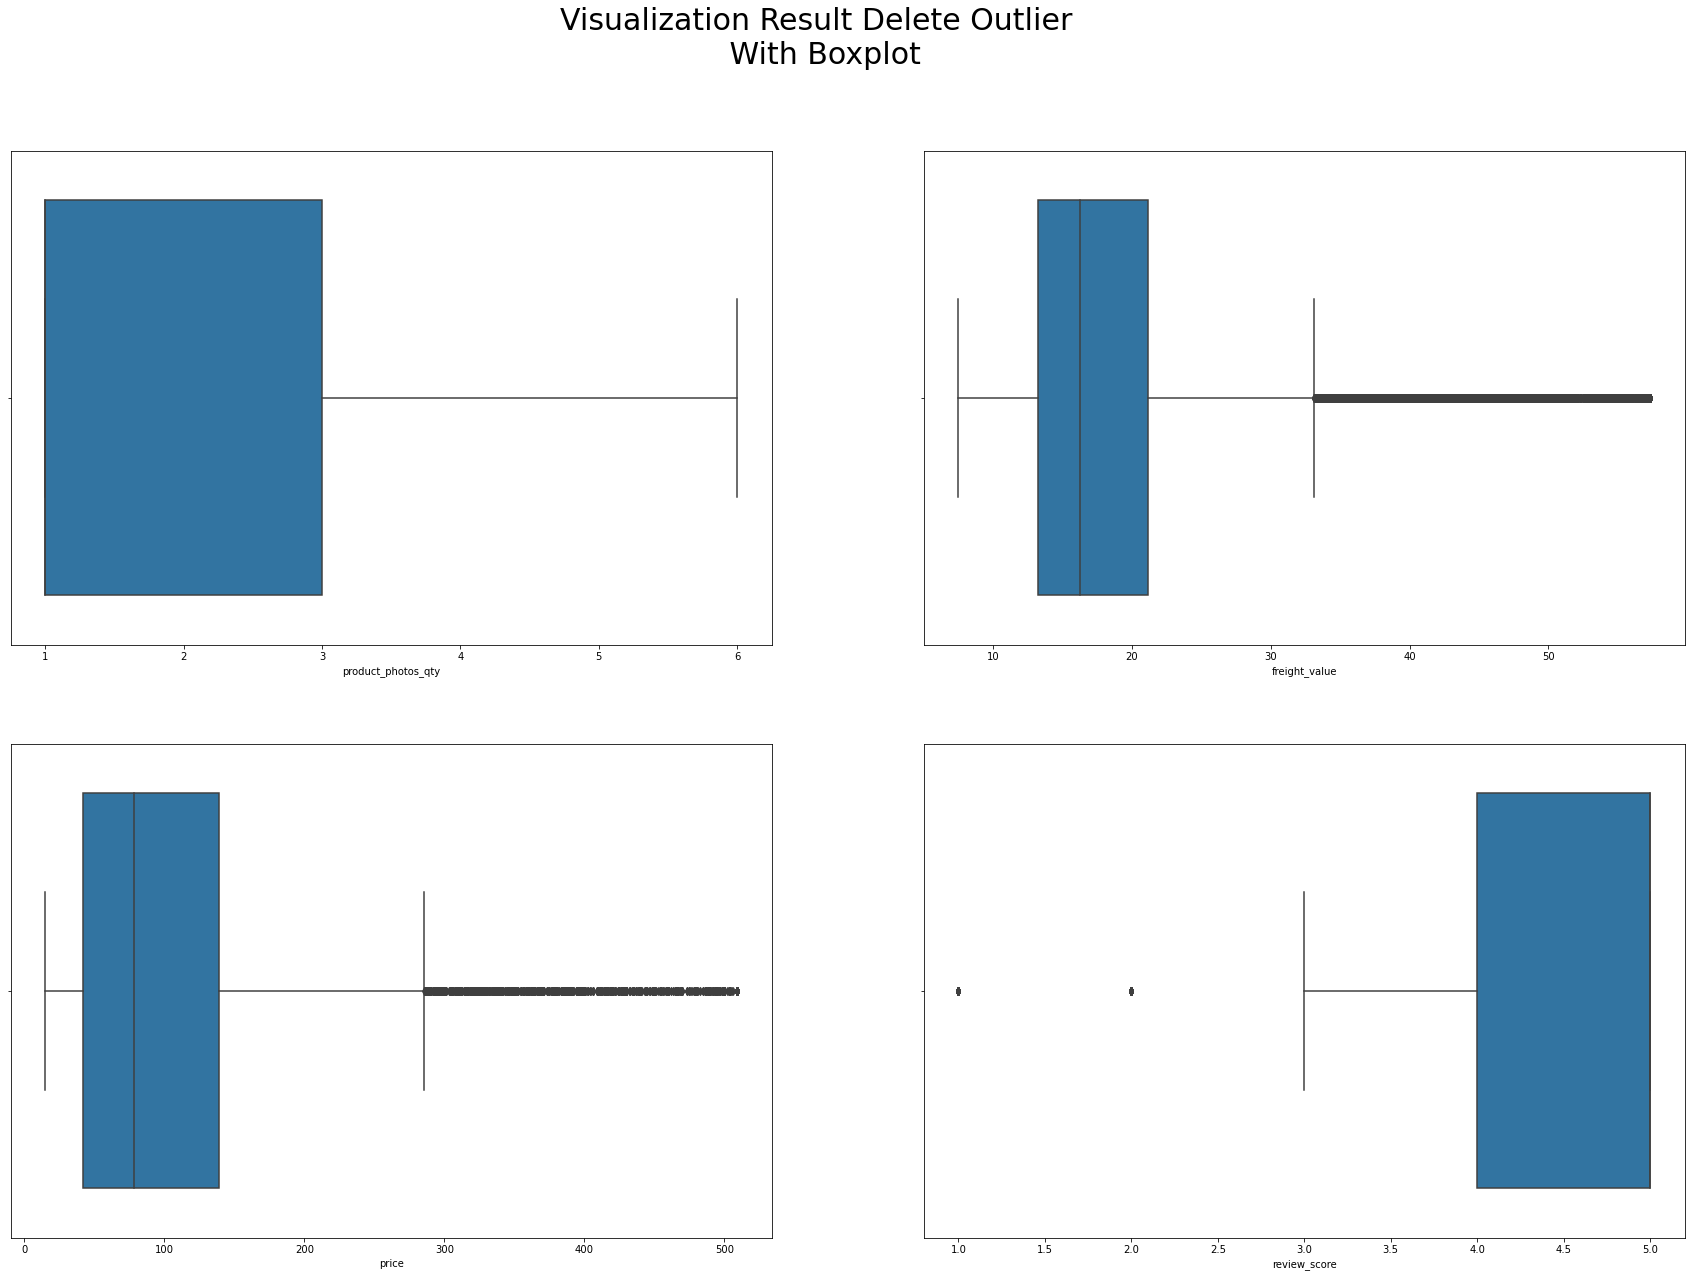

In [15]:
# Pengecekan outlier sesudah dibersihkan
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
fig.suptitle('Visualization Result Delete Outlier \n With Boxplot', fontsize =30)

sns.boxplot(ax=axes[0, 0], data=data_analisa, x='product_photos_qty')
sns.boxplot(ax=axes[0, 1], data=data_analisa, x='freight_value')
sns.boxplot(ax=axes[1, 0], data=data_analisa, x='price')
sns.boxplot(ax=axes[1, 1], data=data_analisa, x='review_score')

# Data Manipulation

In [16]:
# convert data type object to datetime
start_time = data_analisa['order_purchase_timestamp'] = data_analisa['order_purchase_timestamp'].astype('datetime64[ns]')
end_time = data_analisa['order_delivered_customer_date'] = data_analisa['order_delivered_customer_date'].astype('datetime64[ns]')

# date from purchase
data_analisa['hour_purchase'] = data_analisa.order_purchase_timestamp.dt.hour # menyatakan jam
data_analisa['day_purchase'] = data_analisa.order_purchase_timestamp.dt.day # menyatakan tanggal
data_analisa['month_purchase'] = data_analisa.order_purchase_timestamp.dt.month # menyatakan tanggal
data_analisa['year_purchase'] = data_analisa.order_purchase_timestamp.dt.year # menyatakan tahun
data_analisa['day_week_purchase'] = data_analisa.order_purchase_timestamp.dt.dayofweek # menyatakan hari
data_analisa['week_year_purchase'] = data_analisa.order_purchase_timestamp.dt.isocalendar().week # menyatakan minggu keberapa di tahun itu

# date from deliver
data_analisa['hour_deliver'] = data_analisa.order_delivered_customer_date.dt.hour # menyatakan jam
data_analisa['day_deliver'] = data_analisa.order_delivered_customer_date.dt.day # menyatakan tanggal
data_analisa['month_deliver'] = data_analisa.order_delivered_customer_date.dt.month # menyatakan tanggal
data_analisa['year_deliver'] = data_analisa.order_delivered_customer_date.dt.year # menyatakan tahun
data_analisa['day_week_deliver'] = data_analisa.order_delivered_customer_date.dt.dayofweek # menyatakan hari
data_analisa['week_year_deliver'] = data_analisa.order_delivered_customer_date.dt.isocalendar().week # menyatakan minggu keberapa di tahun itu

# range time from purchase to delivery
delay_day = data_analisa['range_days'] = abs(data_analisa['day_purchase'] - data_analisa['day_deliver'])

# Change data  0 from date columns
data_analisa.loc[data_analisa['day_week_deliver'] == 0, 'day_week_deliver'] = 7
data_analisa.loc[data_analisa['day_week_purchase'] == 0, 'day_week_purchase'] = 7
data_analisa.loc[data_analisa['range_days'] == 0, 'range_days'] = 0.5

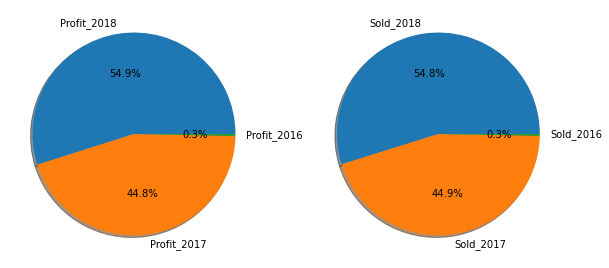

<Figure size 432x288 with 0 Axes>

In [17]:
# pengecekan proporsi profit setiap tahun
condition = data_analisa[(data_analisa['order_status'] == 'delivered')]

# Pembuatan grup data perkatgegori
count_years_price = condition.groupby(["year_purchase"])["price"].count().sort_values(ascending=False).head(5)
sum_years_price = condition.groupby(["year_purchase"])["price"].sum().sort_values(ascending=False).head(5)
count_years_price

# data dan label untuk piechart
data_sum = [5998892.67, 4896112.44, 33478.04]
years_sum = ['Profit_2018', 'Profit_2017', 'Profit_2016']

data_count = [53624, 43899, 272]
years_count = ['Sold_2018', 'Sold_2017', 'Sold_2016']


# Visualization pie chart
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
fig = plt.figure()
axs[0].pie(data_sum, labels=years_sum, autopct='%1.1f%%', shadow=True)
axs[1].pie(data_count, labels=years_count, autopct='%1.1f%%', shadow=True)
plt.show()

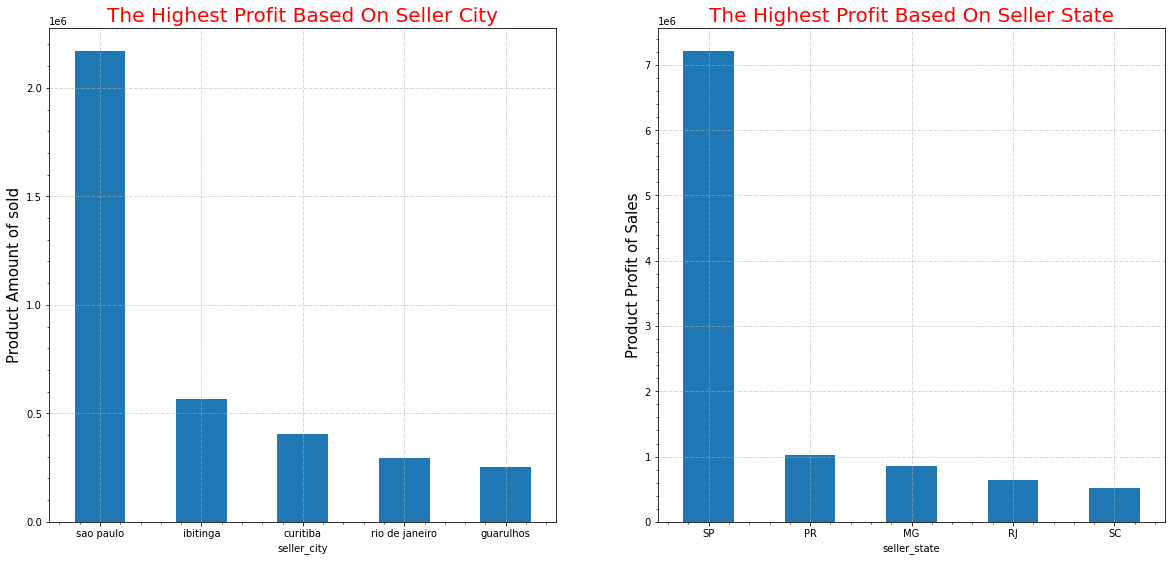

In [18]:
# pengecekan proporsi profit setiap tahun
conditional = data_analisa[(data_analisa['order_status'] == 'delivered')]

# Pembuatan grup data perkatgegori
city_seller = conditional.groupby(["seller_city"])["price"].sum().sort_values(ascending=False).head(5)
state_seller = conditional.groupby(["seller_state"])["price"].sum().sort_values(ascending=False).head(5)

# Visualization
plt.subplot(2, 2, 1)
city_seller.plot(x="price", y="seller_city", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("The Highest Profit Based On Seller City", size = 20, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
state_seller.plot(x="price", y="seller_state", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("The Highest Profit Based On Seller State", size = 20, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

In [19]:
# Persentase kenaikan profit tiap tahun
def persentase_kenaikan ():
    
    profit_2016 = 33478.04 # Tahun 2016
    profit_2017 = 4896112.44 # Tahun 2017
    Persentase = ((profit_2017-profit_2016)/profit_2017)*100
    print (Persentase ,"%")
    
    profit_2018 = 5998892.67 # Tahun 2018
    Persentase = ((profit_2018-profit_2017)/profit_2018)*100
    print (Persentase ,"%")

    # Persentase kenaikan penjualan tiap tahun
    sold_2016 = 272 # Tahun 2016
    sold_2017 = 43899 # Tahun 2017
    Persentase = ((sold_2017-sold_2016)/sold_2017)*100
    print (Persentase ,"%")
    
    sold_2018 = 53624 # Tahun 2018
    Persentase = ((sold_2018-sold_2017)/sold_2018)*100
    print (Persentase ,"%")
    
# call definisi
persentase_kenaikan ()    

99.3162322064646 %
18.383063186226327 %
99.38039590879063 %
18.135536327017753 %


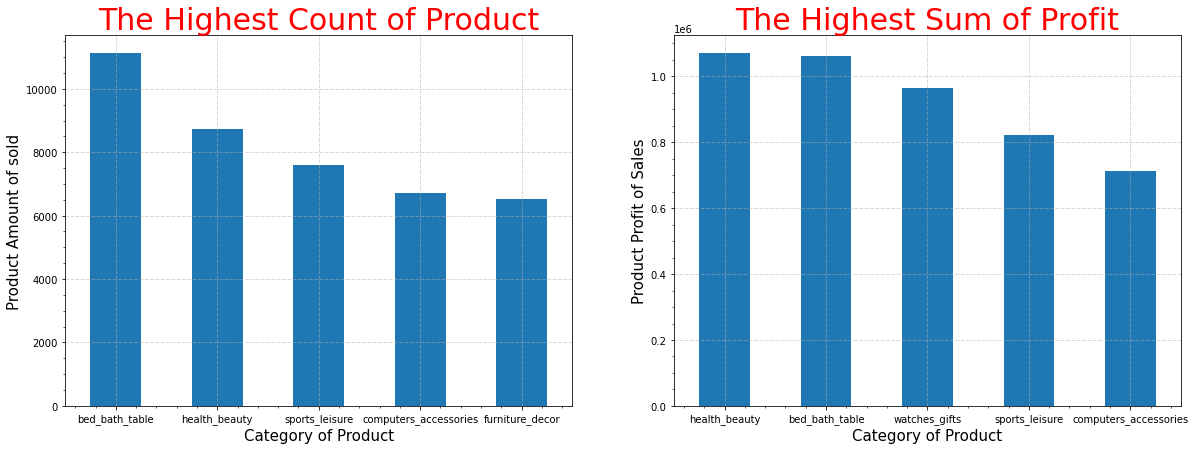

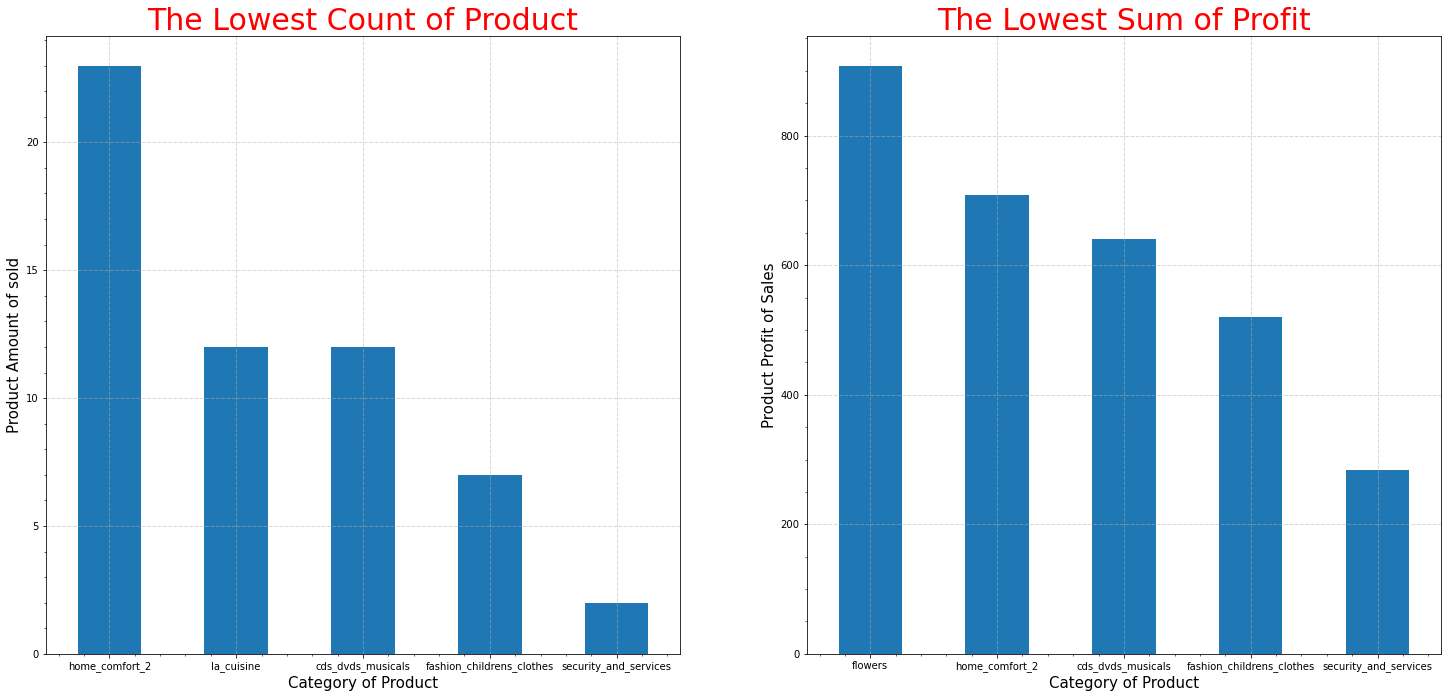

In [20]:
# data barang yang banyak terjual dalam 3 tahun
condition_lowest = data_analisa[(data_analisa['order_status'] == 'delivered')]

count_lowest_price = condition_lowest.groupby(["product"])["price"].count().sort_values(ascending=False).tail(5)
sum_lowest_price = condition_lowest.groupby(["product"])["price"].sum().sort_values(ascending=False).tail(5)

# data barang yang sedikit terjual dalam 3 tahun
condition_highest = data_analisa[(data_analisa['order_status'] == 'delivered')]

count_hight_price = condition_highest.groupby(["product"])["price"].count().sort_values(ascending=False).head(5)
sum_hight_price = condition_highest.groupby(["product"])["price"].sum().sort_values(ascending=False).head(5)

# Visualtization barchart From The Highest
plt.subplot(2, 2, 1)
count_hight_price.plot(x="price", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("The Highest Count of Product", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
sum_hight_price.plot(x="price", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("The Highest Sum of Profit", size = 30, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()


# Visualtization barchart From The Lowst
plt.subplot(2, 2, 3)
count_lowest_price.plot(x="price", y="product", kind="bar", figsize=(25, 25), rot= 0)
plt.title ("The Lowest Count of Product", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 4)
sum_lowest_price.plot(x="price", y="product", kind="bar", figsize=(25, 25), rot= 0)
plt.title ("The Lowest Sum of Profit", size = 30, c = 'r')
plt.ylabel('Product Profit of Sales', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')
plt.show()

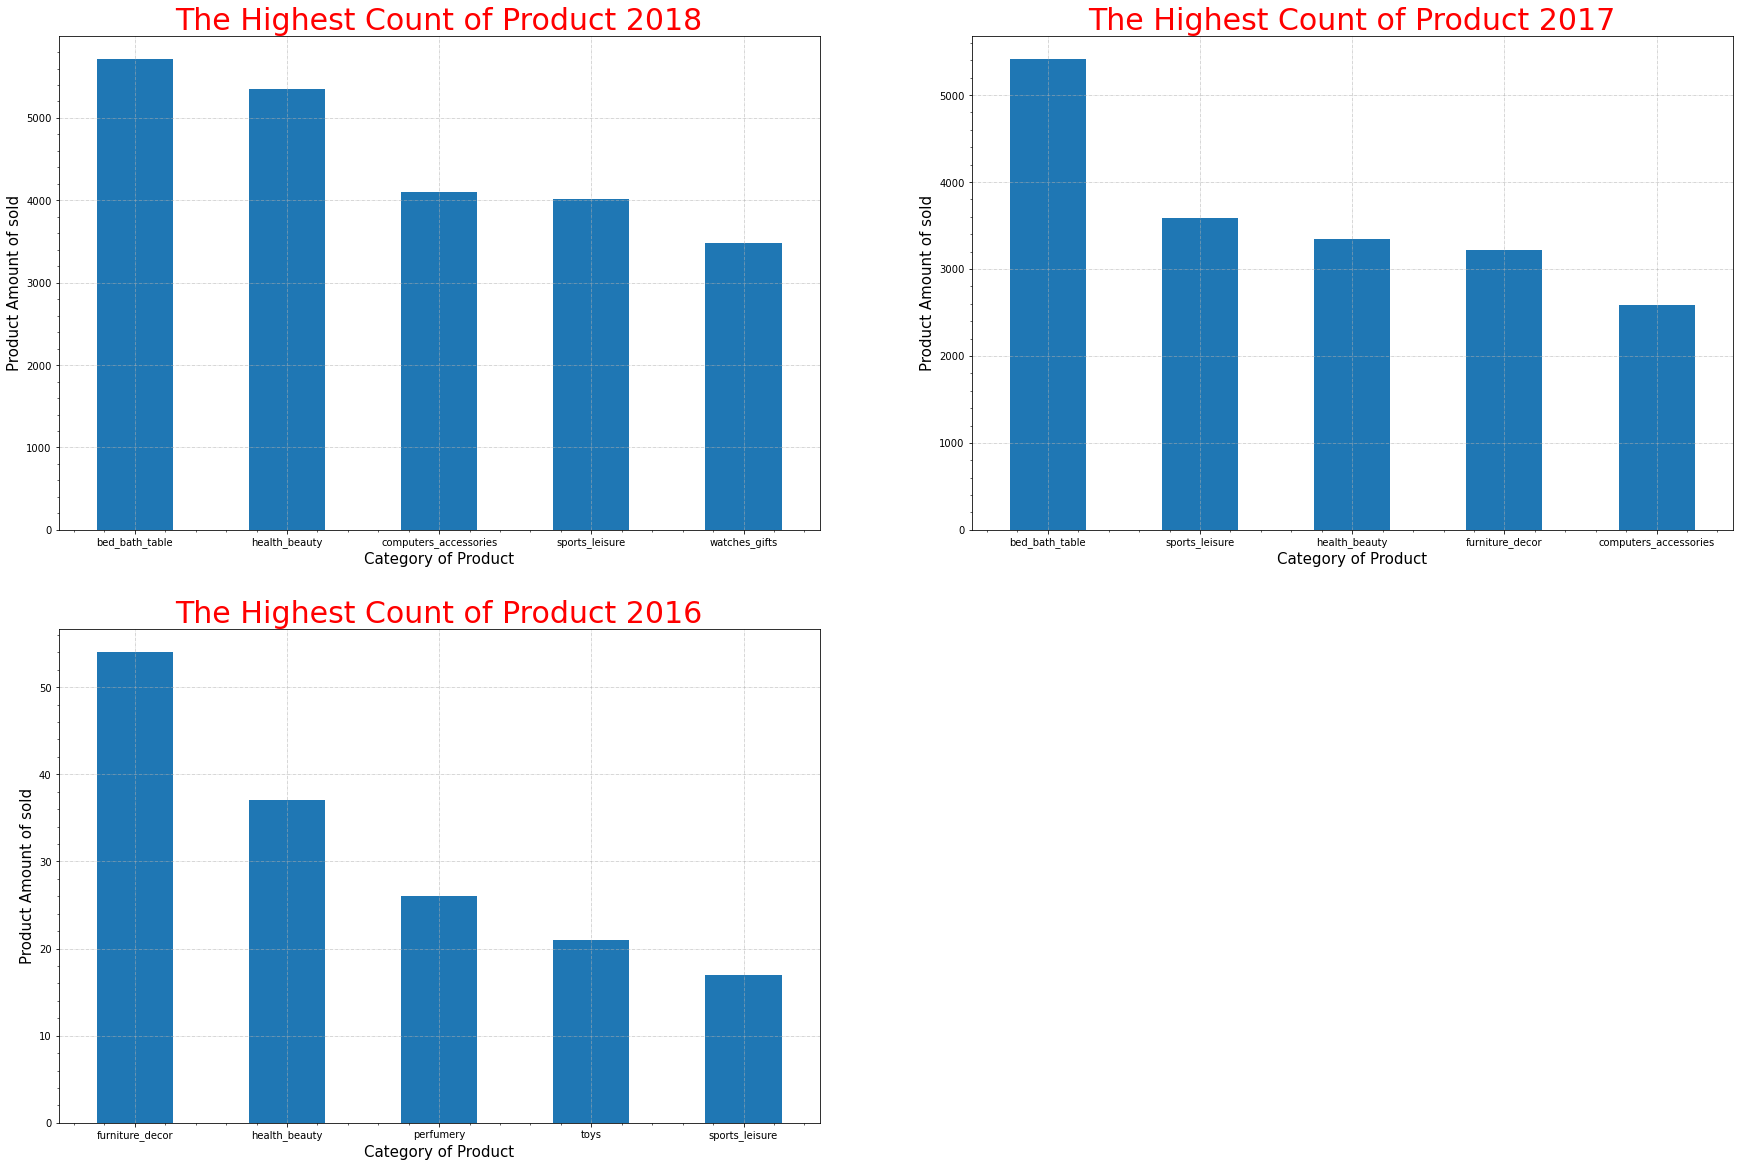

In [21]:
# Trending per tahun (count) the highest
years_2016 = data_analisa[(data_analisa['year_purchase'] == 2016) & (data_analisa['order_status'] == 'delivered')]
bar_2016 = years_2016.groupby(["product"])["price"].count().sort_values(ascending=False).head(5)

years_2017 = data_analisa[(data_analisa['year_purchase'] == 2017) & (data_analisa['order_status'] == 'delivered')]
bar_2017 = years_2017.groupby(["product"])["price"].count().sort_values(ascending=False).head(5)

years_2018 = data_analisa[(data_analisa['year_purchase'] == 2018) & (data_analisa['order_status'] == 'delivered')]
bar_2018 = years_2018.groupby(["product"])["price"].count().sort_values(ascending=False).head(5)

# Visualization
plt.subplot(2, 2, 1)
bar_2018.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest Count of Product 2018", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
bar_2017.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest Count of Product 2017", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
bar_2016.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest Count of Product 2016", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

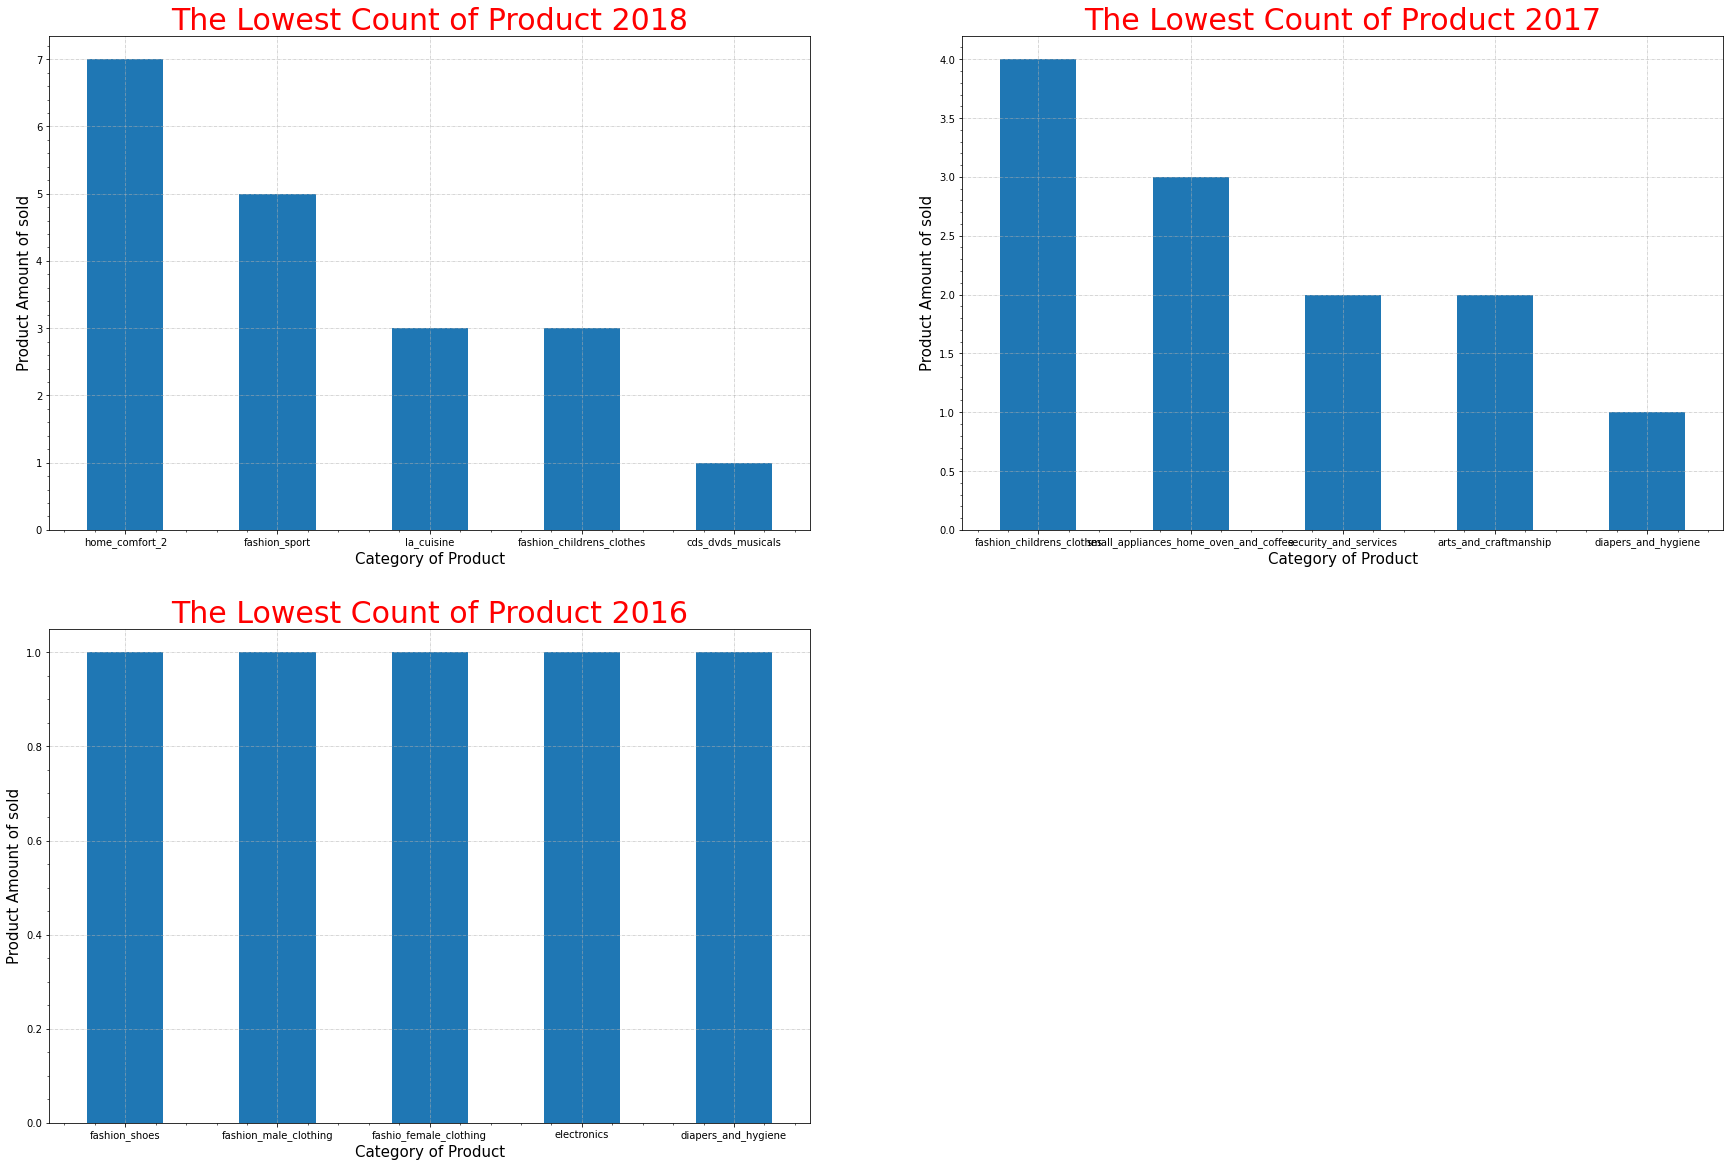

In [22]:
# Trending per tahun (count) the lowest
# membuat kondisi dan groupby
years_2016 = data_analisa[(data_analisa['year_purchase'] == 2016) & (data_analisa['order_status'] == 'delivered') ] 
bar_2016 = years_2016.groupby(["product"])["price"].count().sort_values(ascending=False).tail(5)

years_2017 = data_analisa[(data_analisa['year_purchase'] == 2017) & (data_analisa['order_status'] == 'delivered') ] 
bar_2017 = years_2017.groupby(["product"])["price"].count().sort_values(ascending=False).tail(5)

years_2018 = data_analisa[(data_analisa['year_purchase'] == 2018) & (data_analisa['order_status'] == 'delivered') ] 
bar_2018 = years_2018.groupby(["product"])["price"].count().sort_values(ascending=False).tail(5)

# Visualization
plt.subplot(2, 2, 1)
bar_2018.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Lowest Count of Product 2018", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2)
bar_2017.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Lowest Count of Product 2017", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
bar_2016.plot(x="price", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Lowest Count of Product 2016", size = 30, c = 'r')
plt.ylabel('Product Amount of sold', size = 15)
plt.xlabel('Category of Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

C:\Users\Pompy\AppData\Local\Temp\ipykernel_13588\3600239721.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_product_1 = condition[(data_analisa['product'] == 'bed_bath_table')]
C:\Users\Pompy\AppData\Local\Temp\ipykernel_13588\3600239721.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_product_2 = condition[(data_analisa['product'] == 'health_beauty')]
C:\Users\Pompy\AppData\Local\Temp\ipykernel_13588\3600239721.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_product_3 = condition[(data_analisa['product'] == 'sports_leisure')]
C:\Users\Pompy\AppData\Local\Temp\ipykernel_13588\3600239721.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_product_4 = condition[(data_analisa['product'] == 'computers_accessories')]
C:\Users\Pompy\AppData\Local\Temp\ipykernel_13588\3600239721.py:9: UserWarning: Boolean Series key

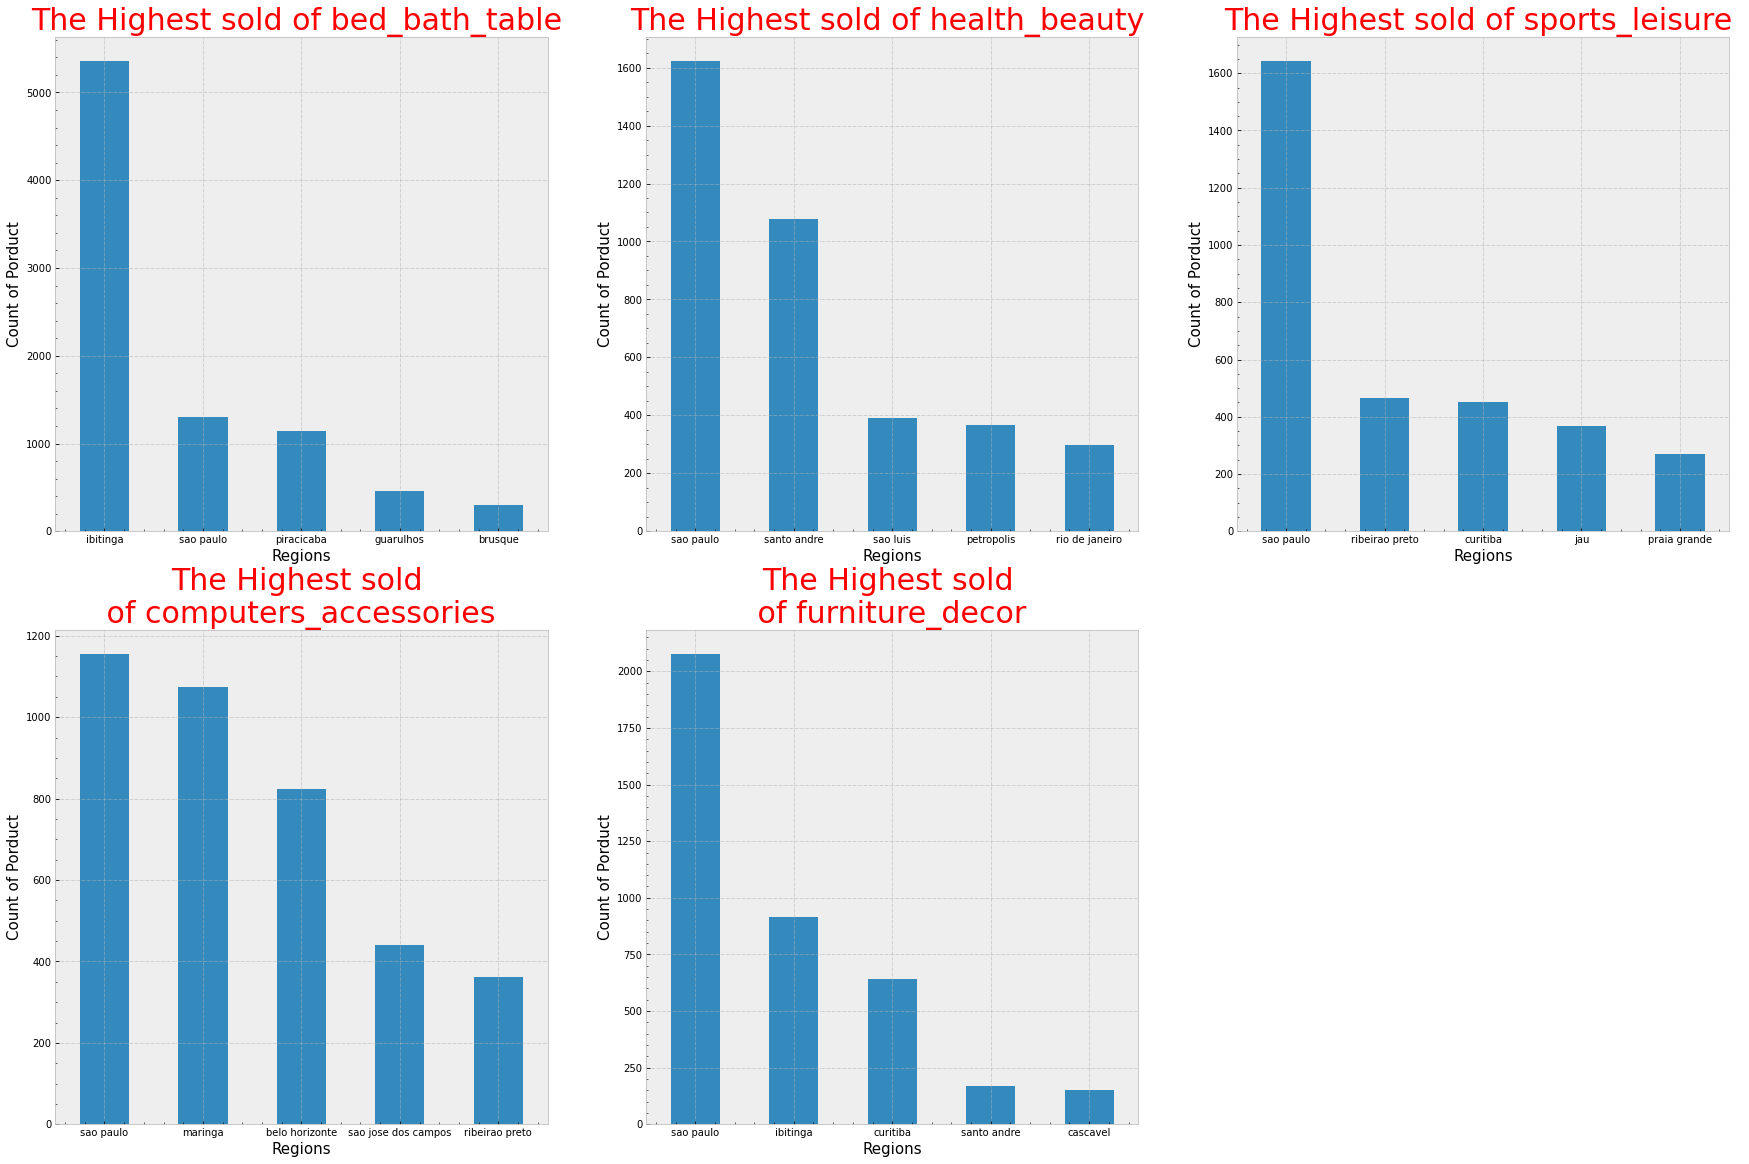

In [52]:
# Wilayah product yang terjual paling besar 
# membuat sebuah kondisi untuk groupby
condition = data_analisa[(data_analisa['order_status'] == 'delivered')]

condition_product_1 = condition[(data_analisa['product'] == 'bed_bath_table')]
condition_product_2 = condition[(data_analisa['product'] == 'health_beauty')]
condition_product_3 = condition[(data_analisa['product'] == 'sports_leisure')]
condition_product_4 = condition[(data_analisa['product'] == 'computers_accessories')]
condition_product_5 = condition[(data_analisa['product'] == 'furniture_decor')]

sum_region_high_1 = condition_product_1.groupby(["seller_city"])["product"].count().sort_values(ascending=False).head()
sum_region_high_2 = condition_product_2.groupby(["seller_city"])["product"].count().sort_values(ascending=False).head()
sum_region_high_3 = condition_product_3.groupby(["seller_city"])["product"].count().sort_values(ascending=False).head()
sum_region_high_4 = condition_product_4.groupby(["seller_city"])["product"].count().sort_values(ascending=False).head()
sum_region_high_5 = condition_product_5.groupby(["seller_city"])["product"].count().sort_values(ascending=False).head()

# Visualitazion
plt.subplot(2, 3, 1)
sum_region_high_1.plot(x="seller_city", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest sold of bed_bath_table ", size = 30, c = 'r')
plt.ylabel('Count of Porduct', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 3, 2)
sum_region_high_2.plot(x="seller_city", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest sold of health_beauty ", size = 30, c = 'r')
plt.ylabel('Count of Porduct', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 3, 3)
sum_region_high_3.plot(x="seller_city", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest sold of sports_leisure ", size = 30, c = 'r')
plt.ylabel('Count of Porduct', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 3, 4)
sum_region_high_4.plot(x="seller_city", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest sold \n of computers_accessories ", size = 30, c = 'r')
plt.ylabel('Count of Porduct', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 3, 5)
sum_region_high_5.plot(x="seller_city", y="product", kind="bar", figsize=(30, 20), rot= 0)
plt.title ("The Highest sold \n of furniture_decor ", size = 30, c = 'r')
plt.ylabel('Count of Porduct', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [24]:
# Pengecekan price tertinggi berdasarkan wilayahnya
condition.groupby(["seller_city"])["price"].sum().sort_values(ascending=False).head()

seller_city
sao paulo         2168877.85
ibitinga           564357.50
curitiba           404234.69
rio de janeiro     293088.78
guarulhos          254336.66
Name: price, dtype: float64

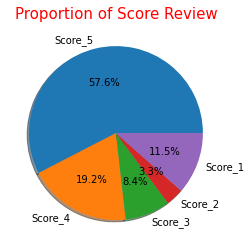

In [25]:
# pengecekan proporsi product favorite
data_analisa.groupby(["review_score"])["review_score"].count().sort_values(ascending=False)

# Visualization
data_score = [57502,19196,8360,3299,11508]
label_score = ['Score_5','Score_4','Score_3','Score_2','Score_1']
plt.pie(data_score, labels=label_score, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of Score Review", size = 15, c = 'r')
plt.show()

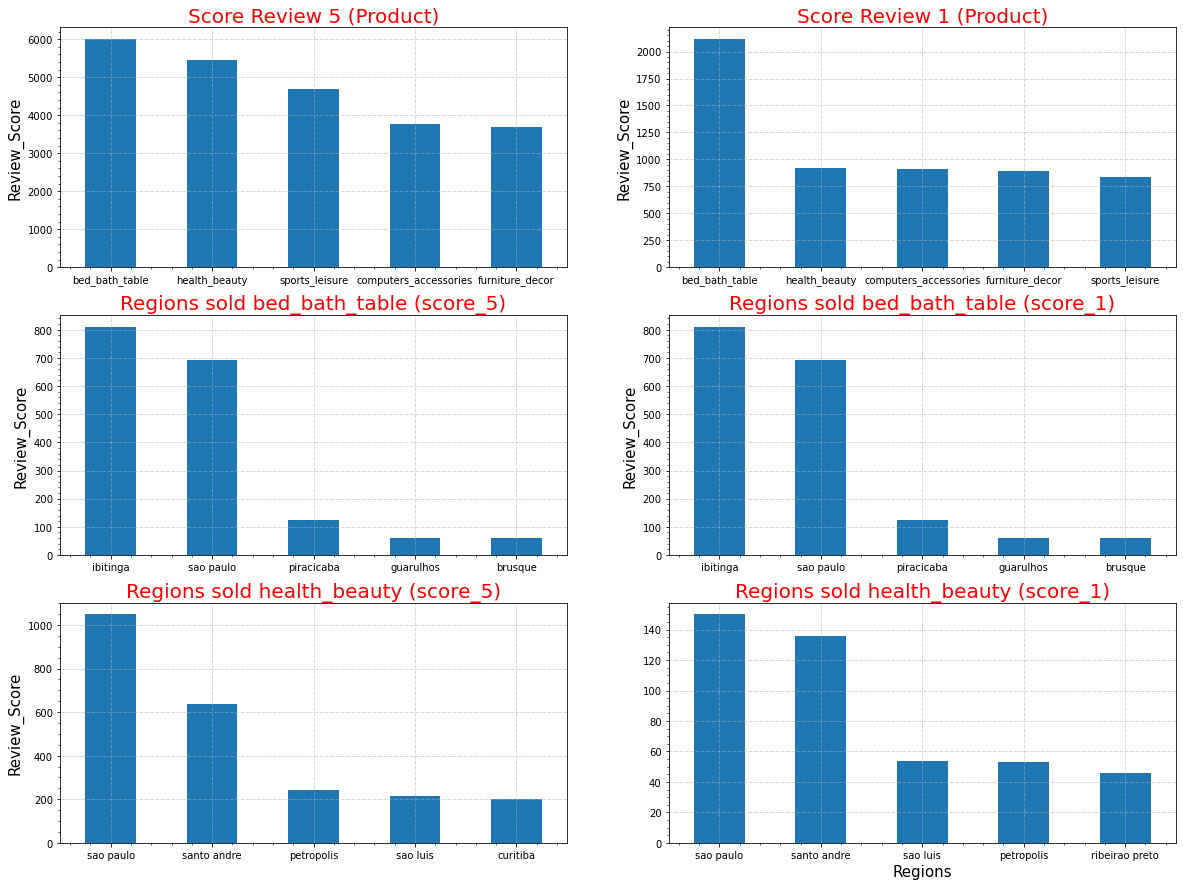

In [26]:
# pengecekan produk base on review score
data_analisa['review_score'] = data_analisa['review_score'].astype('int64') # ubah tipe data ke integer

#review 1 score
score_1 = data_analisa[data_analisa['review_score']== 1.0]
review_1 = score_1.groupby(["product"])["review_score"].count().sort_values(ascending=False).head()

product_1 = data_analisa[ (data_analisa['product'] == 'bed_bath_table') & (data_analisa['review_score']== 1.0)]
seller_1 = product_1.groupby(["seller_city"])["review_score"].count().sort_values(ascending=False).head()

product_1b = data_analisa[ (data_analisa['product'] == 'health_beauty') & (data_analisa['review_score']== 1.0)]
seller_1b = product_1b.groupby(["seller_city"])["review_score"].count().sort_values(ascending=False).head()

#review 5 score
score_5 = data_analisa[data_analisa['review_score'] == 5.0]
review_5 = score_5.groupby(["product"])["review_score"].count().sort_values(ascending=False).head()

product_5 = data_analisa[ (data_analisa['product'] == 'bed_bath_table') & (data_analisa['review_score']== 1.0)]
seller_5 = product_1.groupby(["seller_city"])["review_score"].count().sort_values(ascending=False).head()

product_5b = data_analisa[ (data_analisa['product'] == 'health_beauty') & (data_analisa['review_score']== 5.0)]
seller_5b = product_5b.groupby(["seller_city"])["review_score"].count().sort_values(ascending=False).head()


# Visualization
plt.subplot(3, 2, 2 )
review_1.plot(x="review_score", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Score Review 1 (Product)", size = 20, c = 'r')
plt.ylabel('Review_Score', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(3, 2, 1 )
review_5.plot(x="review_score", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Score Review 5 (Product)", size = 20, c = 'r')
plt.ylabel('Review_Score', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(3, 2, 4 )
seller_1.plot(x="review_score", y="seller_city", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Regions sold bed_bath_table (score_1)", size = 20, c = 'r')
plt.ylabel('Review_Score', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(3, 2, 3 )
seller_5.plot(x="review_score", y="seller_city", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Regions sold bed_bath_table (score_5)", size = 20, c = 'r')
plt.ylabel('Review_Score', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(3, 2, 6 )
seller_1b.plot(x="review_score", y="seller_city", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Regions sold health_beauty (score_1)", size = 20, c = 'r')
plt.ylabel('')
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(3, 2, 5 )
seller_5b.plot(x="review_score", y="seller_city", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Regions sold health_beauty (score_5)", size = 20, c = 'r')
plt.ylabel('Review_Score', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

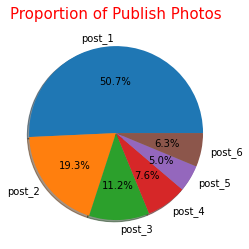

In [27]:
# pengecekan proporsi post product
data_analisa.groupby(["product_photos_qty"])["product_photos_qty"].count().sort_values(ascending=False)

data_post = [51731,19651,11425,7718,5069,6387]
label_post = ['post_1','post_2','post_3','post_4','post_5', 'post_6']
plt.pie(data_post, labels=label_post, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of Publish Photos", size = 15, c = 'r')
plt.show()

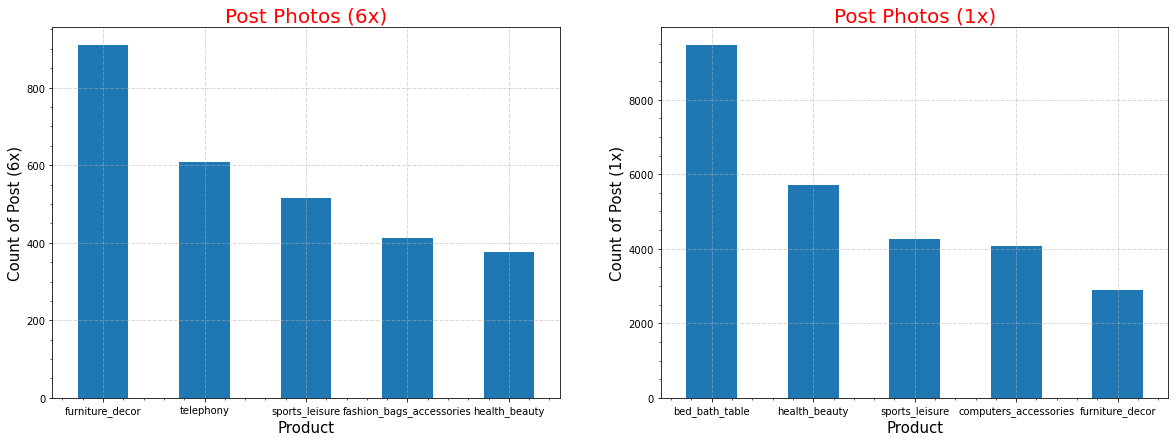

In [28]:
# Pengecekan upload photo
qty_photos = data_analisa[(data_analisa['product_photos_qty'] == 1.0)]
show_qty = qty_photos.groupby(["product"])["product_photos_qty"].count().sort_values(ascending=False).head()

qty_photos1 = data_analisa[(data_analisa['product_photos_qty'] == 6.0) ]
show_qty1 = qty_photos1.groupby(["product"])["product_photos_qty"].count().sort_values(ascending=False).head()

# Visualization
plt.subplot(2, 2, 1 )
show_qty1.plot(x="product_photos_qty", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Post Photos (6x)", size = 20, c = 'r')
plt.ylabel('Count of Post (6x)', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2 )
show_qty.plot(x="product_photos_qty", y="product", kind="bar", figsize=(20, 15), rot= 0)
plt.title ("Post Photos (1x)", size = 20, c = 'r')
plt.ylabel('Count of Post (1x)', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [29]:
# melihat status order product
status = data_analisa.groupby(["order_status"])["order_status"].count().sort_values(ascending=False)
df_status = pd.DataFrame(status)

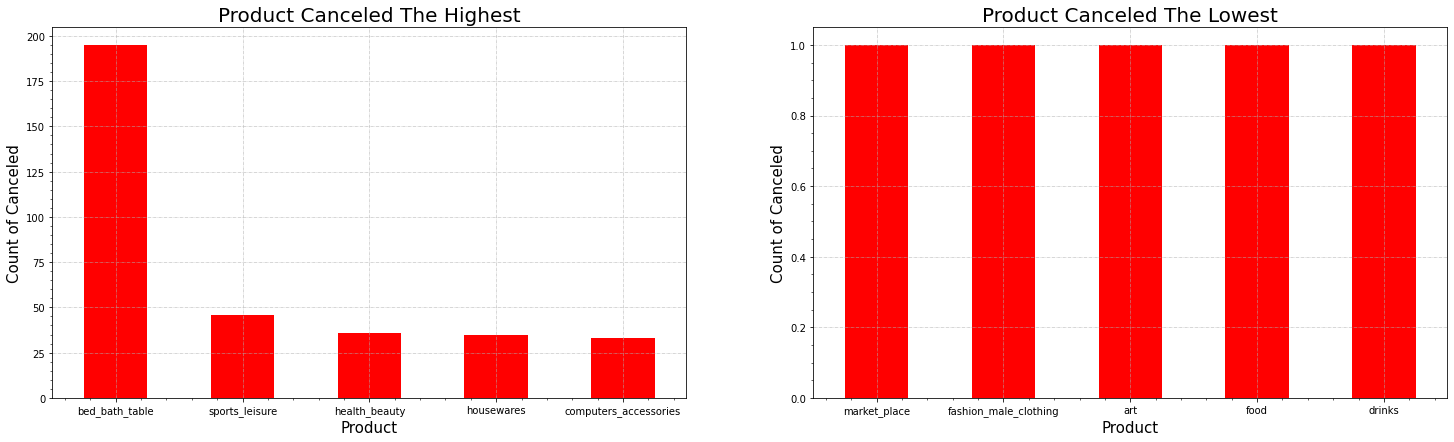

In [30]:
# Pengecekan Comparison Canceled and Delivered
#high condition
condition_cancel_high = data_analisa[data_analisa['order_status'] == 'canceled']
count_cancel_high = condition_cancel_high.groupby(["product"])["order_status"].count().sort_values(ascending=False).head()

#low condition
condition_cancel_low = data_analisa[data_analisa['order_status'] == 'canceled']
count_cancel_low = condition_cancel_low.groupby(["product"])["order_status"].count().sort_values(ascending=False).tail()

# Visualization The Highest
plt.subplot(2, 2, 1 )
count_cancel_high.plot(x="order_status", y="product", kind="bar", figsize=(25, 15), rot= 0, facecolor='r')
plt.title ("Product Canceled The Highest", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization The Lowest
plt.subplot(2, 2, 2)
count_cancel_low.plot(x="order_status", y="product", kind="bar", figsize=(25, 15), rot= 0, facecolor='r')
plt.title ("Product Canceled The Lowest", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

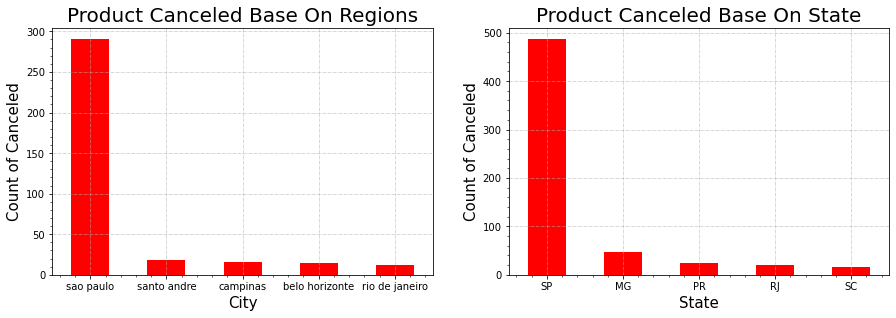

In [31]:
# Wilayah yang sering dicancel
city_cancel = data_analisa[data_analisa['order_status'] == 'canceled'] 
city_cancel_head = city_cancel.groupby(["seller_city"])["seller_city"].count().sort_values(ascending=False).head()
state_cancel_head = city_cancel.groupby(["seller_state"])["seller_state"].count().sort_values(ascending=False).head()

#Visualization
plt.subplot(2, 2, 1 )
city_cancel_head.plot(x="seller_city", y="seller_city", kind="bar", figsize=(15, 10), rot= 0, facecolor='r')
plt.title ("Product Canceled Base On Regions", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('City',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2 )
state_cancel_head.plot(x="seller_state", y="seller_state", kind="bar", figsize=(15, 10), rot= 0, facecolor='r')
plt.title ("Product Canceled Base On State", size = 20, c = 'black')
plt.ylabel('Count of Canceled', size = 15)
plt.xlabel('State',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

Text(10, 11164, 'Purchase The Highest (Month 8)')

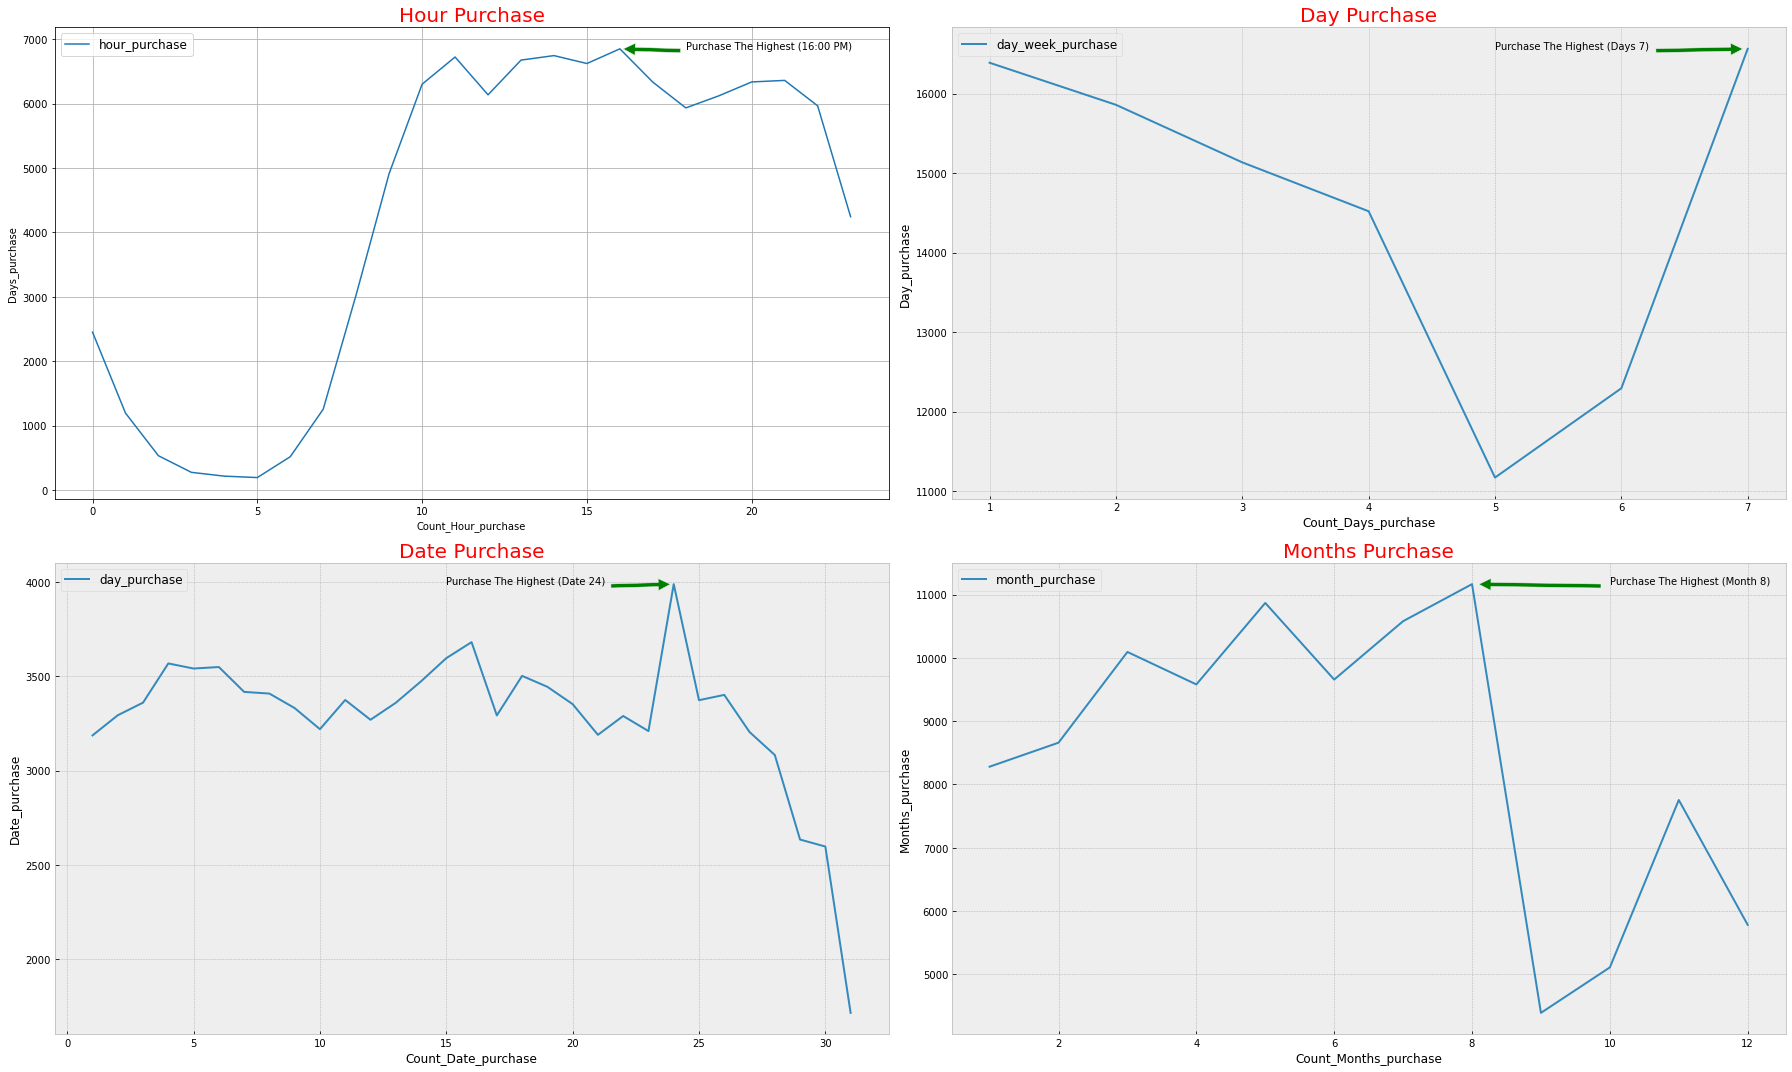

In [32]:
# Jam berapa yang paling sering terjadi pembelian 
hour_analisis = data_analisa.groupby(["hour_purchase"])["hour_purchase"].count()
day_analisis = data_analisa.groupby(["day_week_purchase"])["day_week_purchase"].count()
date_analisis = data_analisa.groupby(["day_purchase"])["day_purchase"].count()
months_analisis = data_analisa.groupby(["month_purchase"])["month_purchase"].count()

# Visualization
plt.subplot(2, 2, 1 )
ax = hour_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Hour_purchase")
ax.set_ylabel("Days_purchase")
plt.title('Hour Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (16:00 PM)', xy=(16, 6850),xytext=(18, 6850),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

plt.subplot(2, 2, 2 )
ax = day_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Days_purchase")
ax.set_ylabel("Day_purchase")
plt.title('Day Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (Days 7)', xy=(7, 16562),xytext=(5, 16562),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

plt.subplot(2, 2, 3 )
ax = date_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Date_purchase")
ax.set_ylabel("Date_purchase")
plt.title('Date Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (Date 24)', xy=(24, 3990),xytext=(15, 3990),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

plt.subplot(2, 2, 4 )
ax = months_analisis.plot(figsize=(25, 15))
ax.set_xlabel("Count_Months_purchase")
ax.set_ylabel("Months_purchase")
plt.title('Months Purchase', fontsize = 20, c='r')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
plt.annotate('Purchase The Highest (Month 8)', xy=(8, 11164),xytext=(10, 11164),
             arrowprops=dict(facecolor='green', shrink=0.05),
             )

In [33]:
# Pengecekan date tertinggi pada suatu product dan regions
# membuat kondisi date tertinggi
regions_hour = data_analisa[data_analisa['hour_purchase'] == 16] 
regions_days = data_analisa[data_analisa['day_week_purchase'] == 7] 
regions_week = data_analisa[data_analisa['day_purchase'] == 24] 
regions_months = data_analisa[data_analisa['month_purchase'] == 8] 

# Base on Regions
count_regions = regions_hour.groupby(["seller_city"])["hour_purchase"].count().sort_values(ascending=False).head()
count_regions_1 = regions_days.groupby(["seller_city"])["day_purchase"].count().sort_values(ascending=False).head()
count_regions_2 = regions_week.groupby(["seller_city"])["day_week_purchase"].count().sort_values(ascending=False).head()
count_regions_3 = regions_months.groupby(["seller_city"])["month_purchase"].count().sort_values(ascending=False).head()

# Base on Product
count_product = regions_hour.groupby(["product"])["hour_purchase"].count().sort_values(ascending=False).head()
count_product_1 = regions_days.groupby(["product"])["day_purchase"].count().sort_values(ascending=False).head()
count_product_2 = regions_week.groupby(["product"])["day_week_purchase"].count().sort_values(ascending=False).head()
count_product_3 = regions_months.groupby(["product"])["month_purchase"].count().sort_values(ascending=False).head()

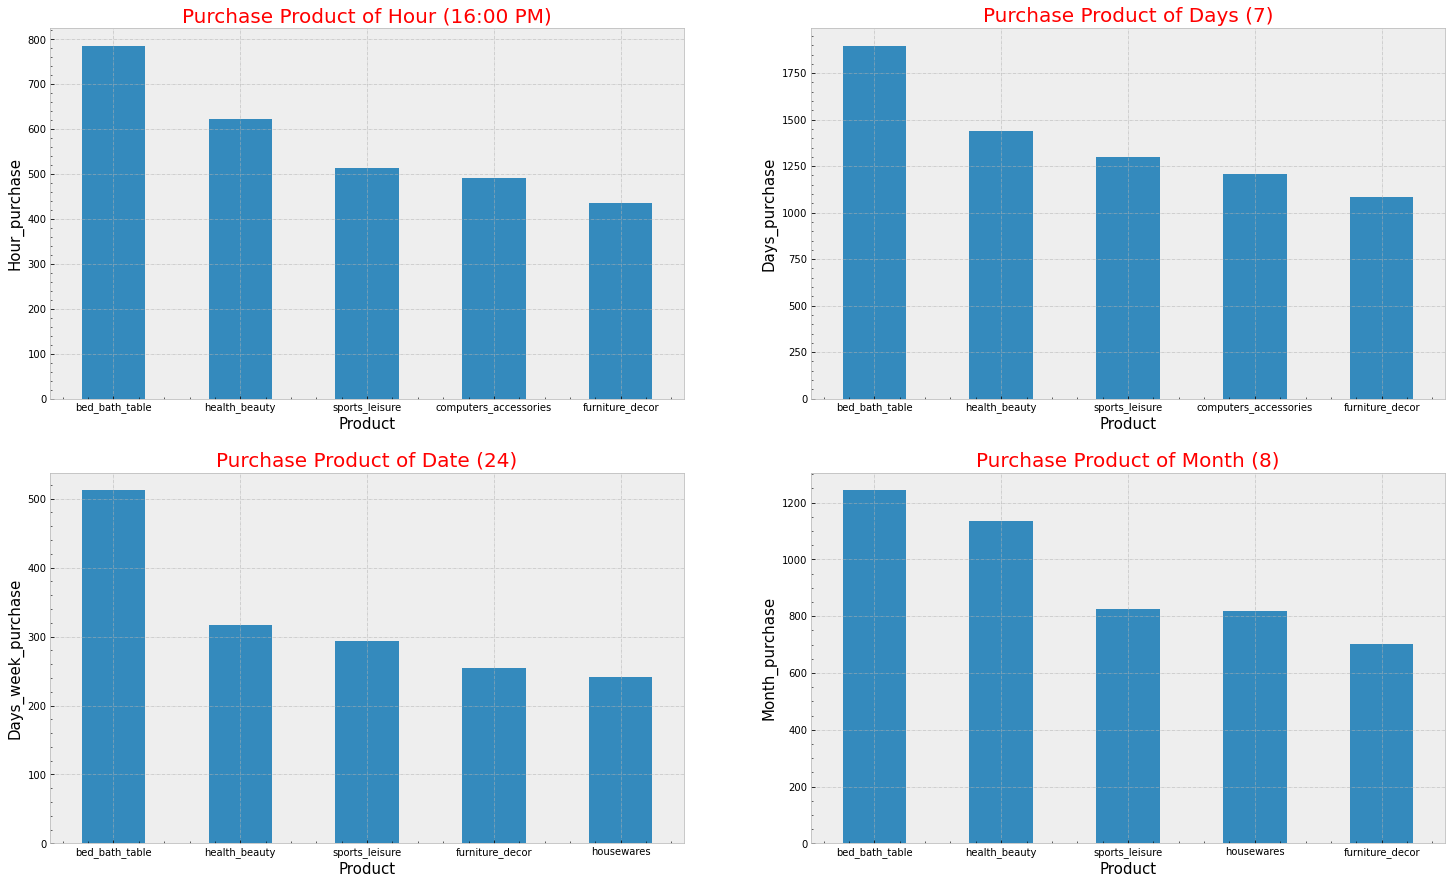

In [34]:
# Visualization Product date tertinggi
plt.subplot(2, 2, 1 )
count_product.plot(x="hour_purchase", y="product", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Product of Hour (16:00 PM)", size = 20, c = 'r')
plt.ylabel('Hour_purchase', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2 )
count_product_1.plot(x="day_purchase", y="product", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Product of Days (7)", size = 20, c = 'r')
plt.ylabel('Days_purchase', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
count_product_2.plot(x="day_week_purchase", y="product", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Product of Date (24)", size = 20, c = 'r')
plt.ylabel('Days_week_purchase', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 4 )
count_product_3.plot(x="month_purchase", y="product", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Product of Month (8)", size = 20, c = 'r')
plt.ylabel('Month_purchase', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

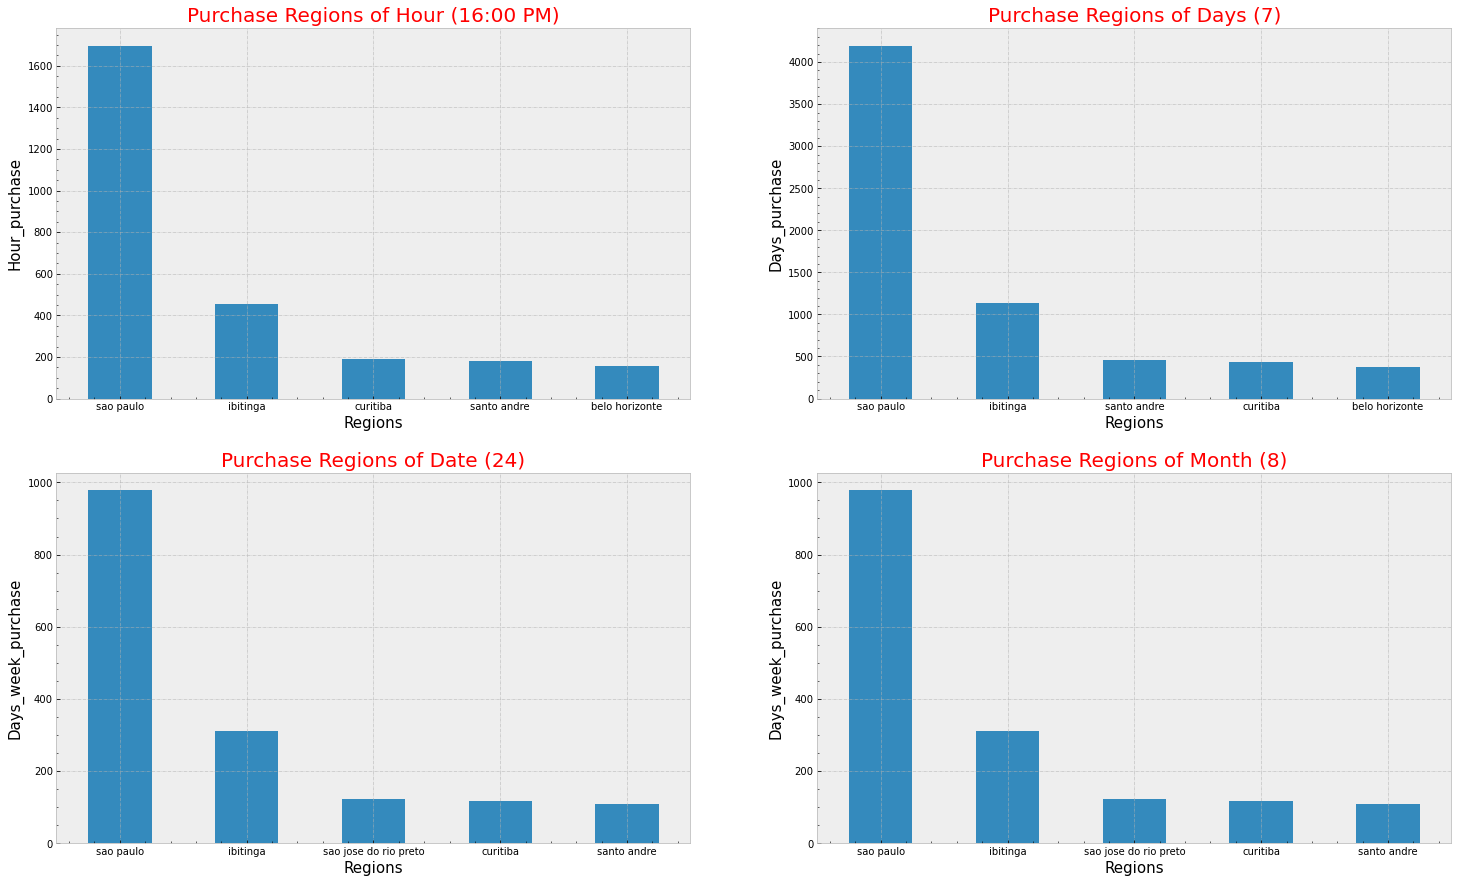

In [35]:
# Visualization Regions date tertinggi 
plt.subplot(2, 2, 1 )
count_regions.plot(x="hour_purchase", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Regions of Hour (16:00 PM)", size = 20, c = 'r')
plt.ylabel('Hour_purchase', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2 )
count_regions_1.plot(x="day_purchase", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Regions of Days (7)", size = 20, c = 'r')
plt.ylabel('Days_purchase', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
count_regions_2.plot(x="day_week_purchase", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Regions of Date (24)", size = 20, c = 'r')
plt.ylabel('Days_week_purchase', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 4 )
count_regions_2.plot(x="month_purchase", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Purchase Regions of Month (8)", size = 20, c = 'r')
plt.ylabel('Days_week_purchase', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

C:\Users\Pompy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


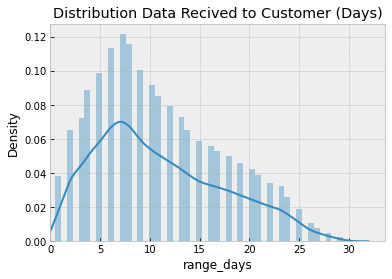

Median of recive days is 10.0


In [36]:
#Visualization Distribusi range days deliver
recive_day = data_analisa['range_days'].dropna()
sns.distplot(recive_day)
plt.title("Distribution Data Recived to Customer (Days)")
plt.xlim (0)
plt.show()

#show modus
print(f'Median of recive days is {data_analisa["range_days"].median()}')

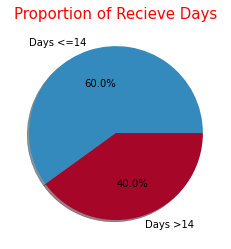

In [37]:
# see the accepted time of each category
condition_recive_1 = data_analisa[data_analisa['range_days'] <= 14 ]
result_1 = condition_recive_1.groupby(["product"])["range_days"].count().sort_values(ascending=False).head()

condition_recive_2 = data_analisa[data_analisa['range_days'] > 14 ]
result_2 = condition_recive_2.groupby(["product"])["range_days"].count().sort_values(ascending=False).head()

# proportion >14 days vs <=14 days
recive_cs = [59777, 39922]
label_recive = ['Days <=14','Days >14']
plt.pie(recive_cs, labels=label_recive, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of Recieve Days", size = 15, c = 'r')
plt.show()

In [38]:
#melihat kategori group jumlah seller_city to range_days > 14 days
result_region = condition_recive_2.groupby(["seller_city"])["range_days"].count().sort_values(ascending=False).head()

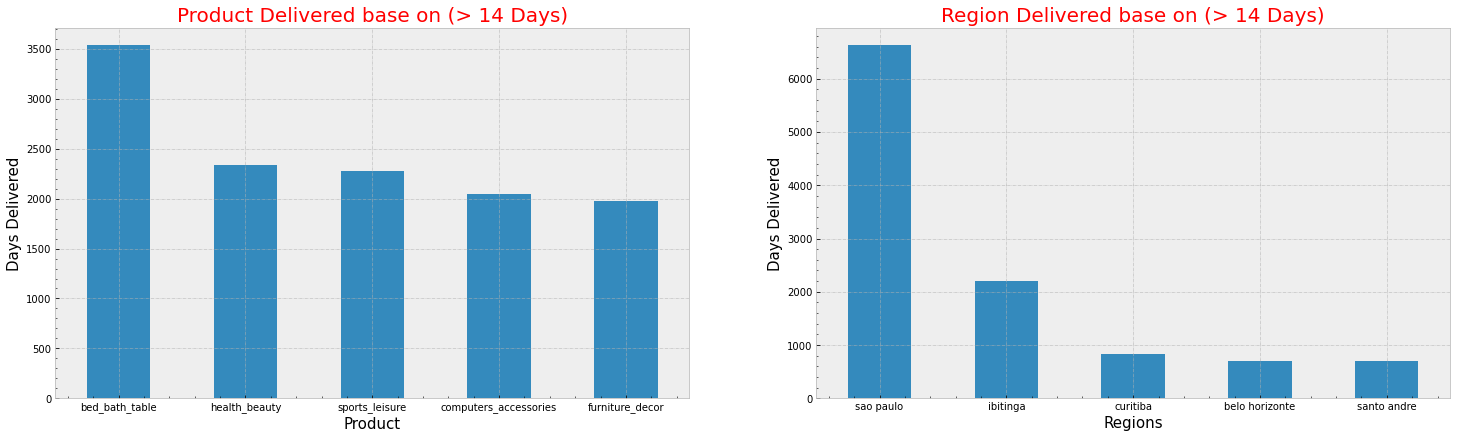

In [39]:
# Visualization
plt.subplot(2, 2, 2 )
result_region.plot(x="range_days", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Region Delivered base on (> 14 Days)", size = 20, c = 'r')
plt.ylabel('Days Delivered', size = 15)
plt.xlabel('Regions',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 1 )
result_2.plot(x="range_days", y="product", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Product Delivered base on (> 14 Days)", size = 20, c = 'r')
plt.ylabel('Days Delivered', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

In [40]:
# Melihat ongkir terbesar dan terkecil
ongkir = data_analisa[data_analisa['order_status'] == 'delivered']
freight_high = pd.Series(ongkir['freight_value'].unique()).sort_values(ascending=False).head(1)
freight_low = pd.Series(ongkir['freight_value'].unique()).sort_values(ascending=False).tail(1)
df = pd.concat({'Teratas': freight_high,'Terbawah' : freight_low})
pd.DataFrame(df)

,,0
Teratas,4,57.33
Terbawah,6,7.49


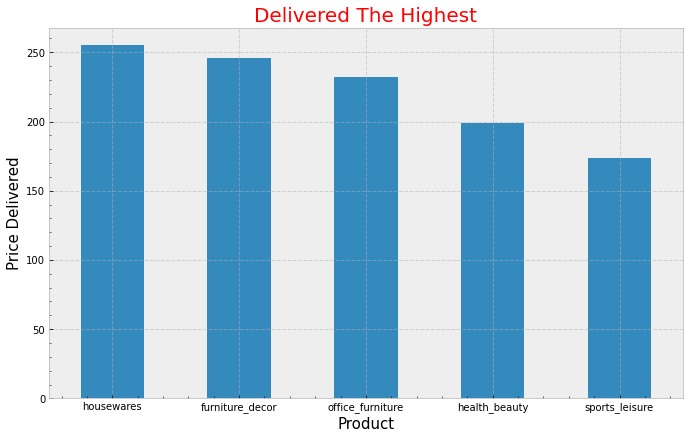

In [41]:
# Membuat kondisi Ongkir tertinggi dan terendah untuk mengetahuin productnya
ongkir_termahal = data_analisa[(data_analisa['freight_value'] == 57.33) & (data_analisa['order_status'] == 'delivered')]
high_ongkir = ongkir_termahal.groupby(["product"])["freight_value"].count().sort_values(ascending=False).head()

ongkir_termurah = data_analisa[(data_analisa['freight_value'] == 7.49) & (data_analisa['order_status'] == 'delivered')]
low_ongkir = ongkir_termurah.groupby(["product"])["freight_value"].count().sort_values(ascending=False).head()

# Visualization
plt.subplot(2, 2, 1 )
high_ongkir.plot(x="freight_value", y="product", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Delivered The Highest", size = 20, c = 'r')
plt.ylabel('Price Delivered', size = 15)
plt.xlabel('Product',  size = 15)
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

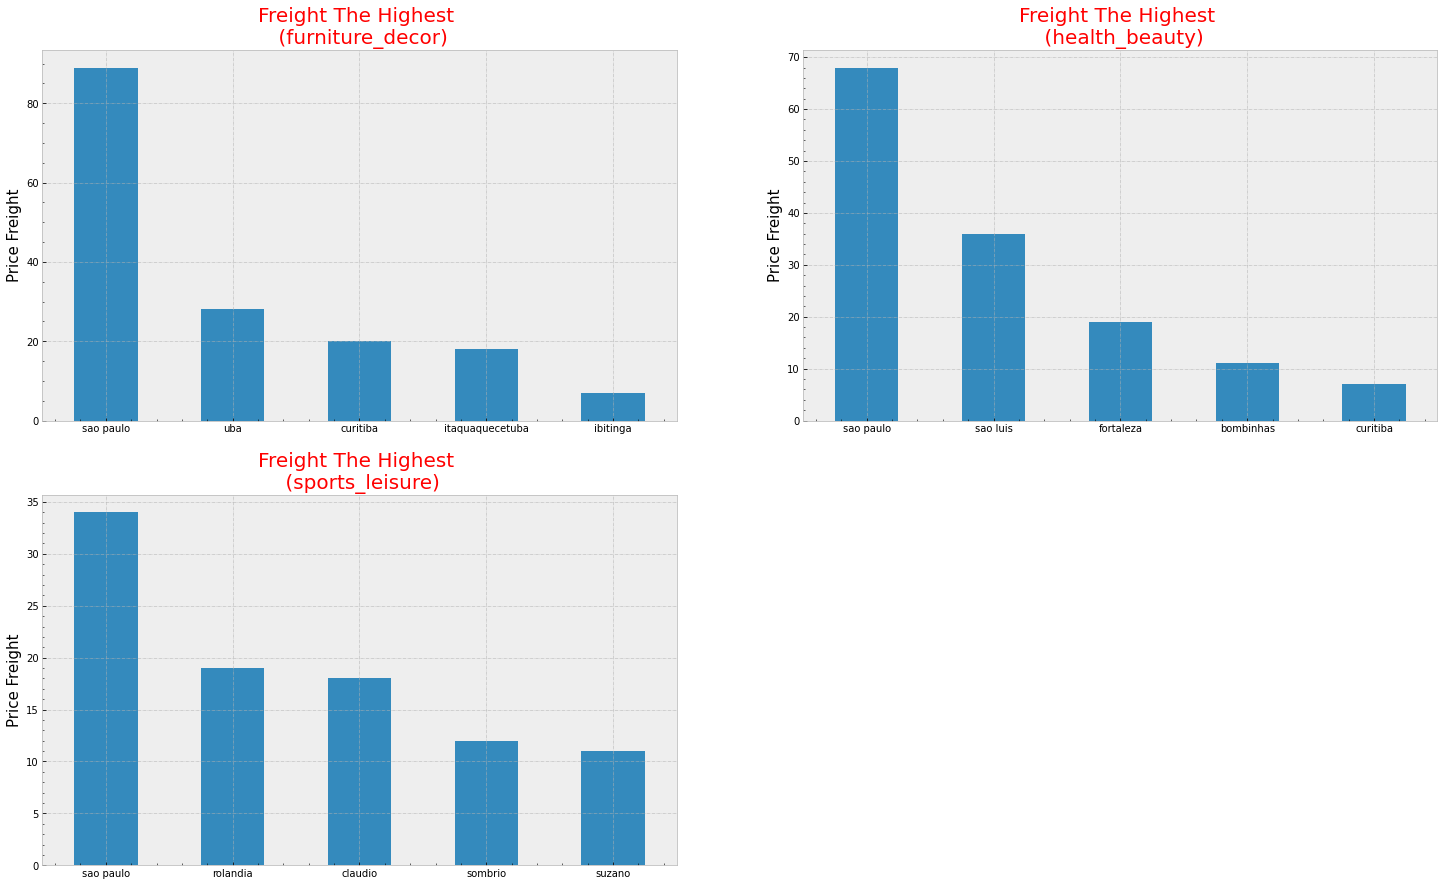

In [42]:
# Regions freight_value the highest
furn = data_analisa[(data_analisa['freight_value'] == 57.33) & (data_analisa['order_status'] == 'delivered') & (data_analisa['product'] == 'furniture_decor')]
heal = data_analisa[(data_analisa['freight_value'] == 57.33) & (data_analisa['order_status'] == 'delivered') & (data_analisa['product'] == 'health_beauty')]
sport = data_analisa[(data_analisa['freight_value'] == 57.33) & (data_analisa['order_status'] == 'delivered') & (data_analisa['product'] == 'sports_leisure')]


region_termahal_furn = furn.groupby(["seller_city"])["freight_value"].count().sort_values(ascending=False).head()
region_termahal_heal = heal.groupby(["seller_city"])["freight_value"].count().sort_values(ascending=False).head()
region_termahal_sport = sport.groupby(["seller_city"])["freight_value"].count().sort_values(ascending=False).head()

# Visualization
plt.subplot(2, 2, 1 )
region_termahal_furn.plot(x="freight_value", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Freight The Highest \n (furniture_decor)", size = 20, c = 'r')
plt.ylabel('Price Freight', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 2 )
region_termahal_heal.plot(x="freight_value", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Freight The Highest \n (health_beauty)", size = 20, c = 'r')
plt.ylabel('Price Freight', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

plt.subplot(2, 2, 3 )
region_termahal_sport.plot(x="freight_value", y="seller_city", kind="bar", figsize=(25, 15), rot= 0)
plt.title ("Freight The Highest \n (sports_leisure)", size = 20, c = 'r')
plt.ylabel('Price Freight', size = 15)
plt.xlabel('')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

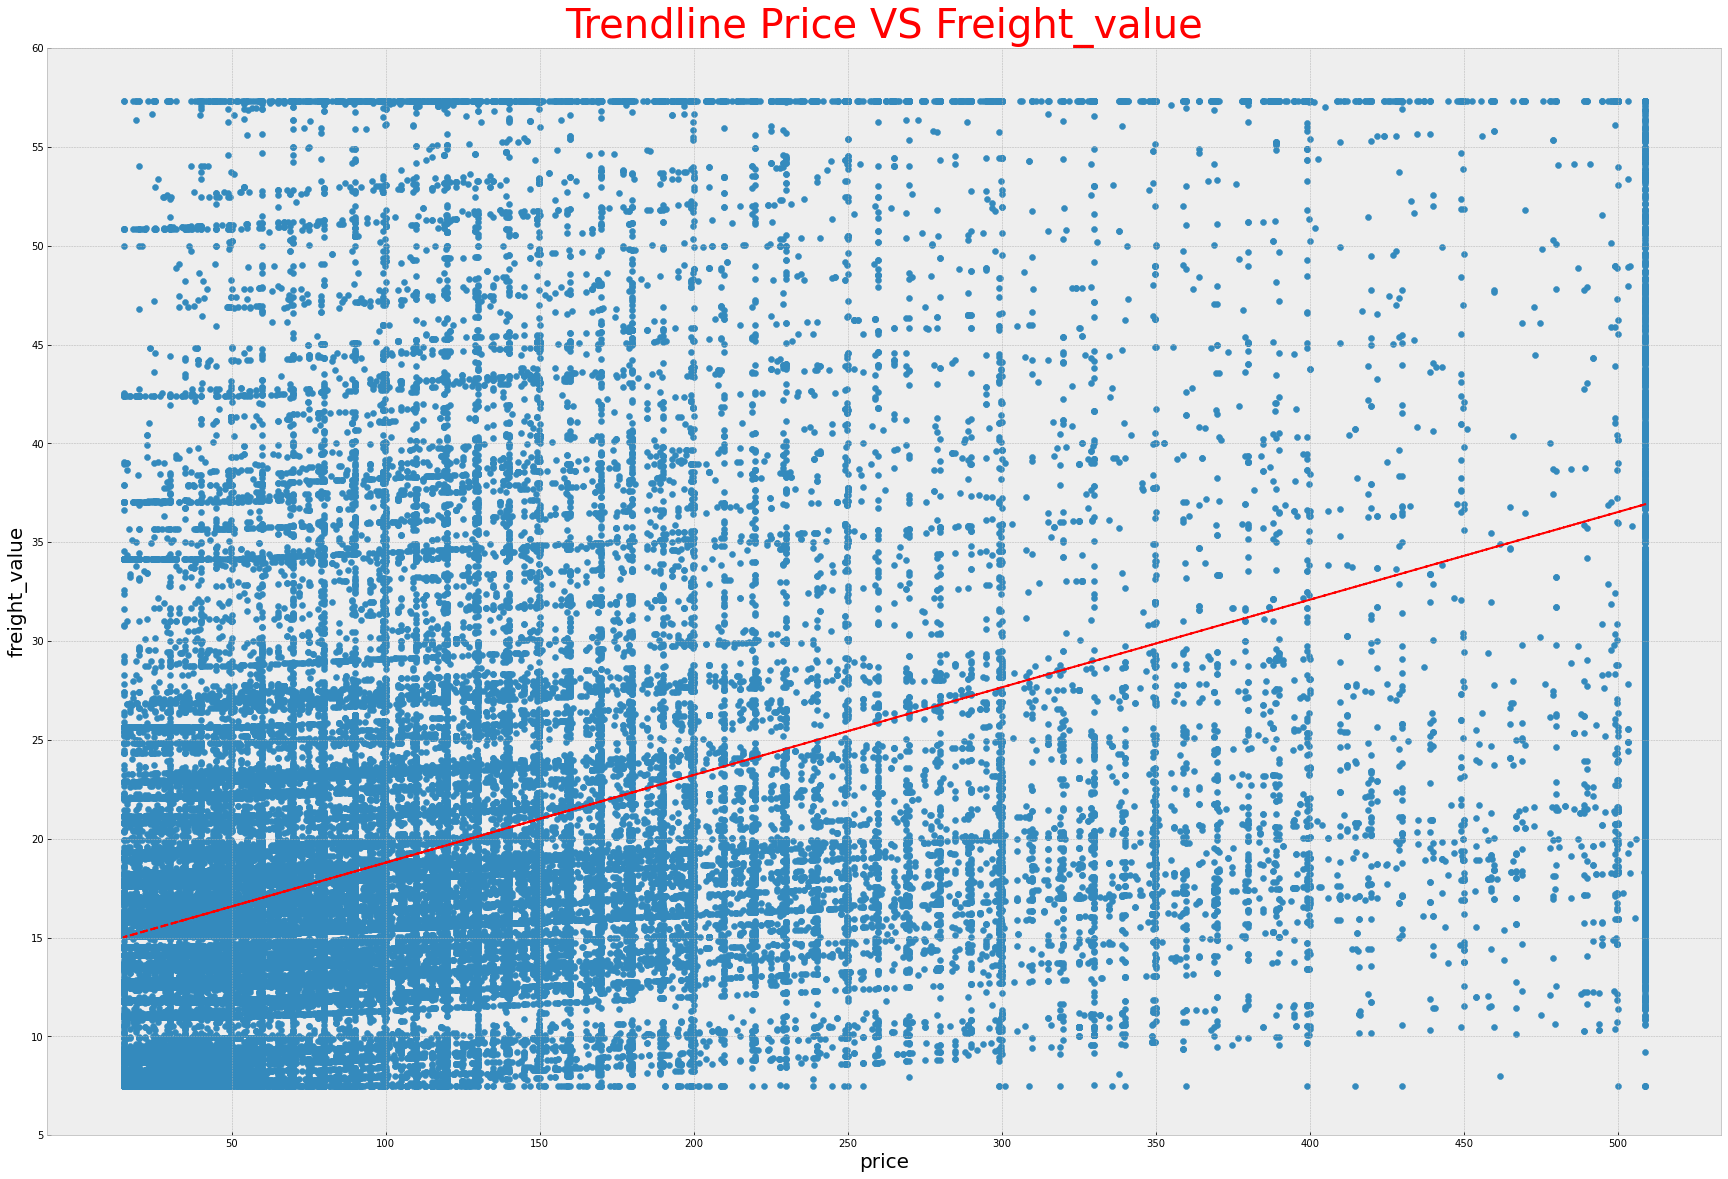

Trendline : y=0.044336x+(14.357383)


In [43]:
# Trendline price vs freight_value
x = data_analisa['price']
y = data_analisa['freight_value']
plt.figure(figsize=(30, 20))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.ylabel('freight_value', size = 20)
plt.xlabel('price',  size = 20)
plt.title('Trendline Price VS Freight_value',  size = 40, c='r')
plt.xticks([50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
plt.show()
print (f'Trendline : {"y=%.6fx+(%.6f)"%(z[0],z[1])}')

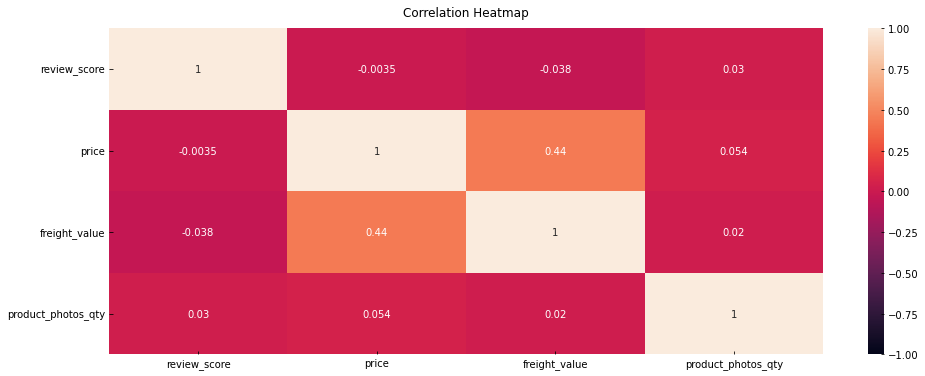

In [44]:
# Correlation HeatMap
calculation = data_analisa[['review_score', 'price', 'freight_value', 'product_photos_qty']]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(calculation.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);